<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/Zemlyakov%20Serj/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_1_%D0%9F%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3(%D0%BE%D1%84%D0%BE%D1%80%D0%BC%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

import string

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

import random

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

!pip install tensorflow-addons

import tensorflow_addons as tfa

from tensorflow_addons.metrics import F1Score

%matplotlib inline



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 35.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# Mount Google Drive
import os
from google.colab import drive

drive.mount('/content/drive')
!pwd
!ls



In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/internsheep1/profpat_1.csv')
# df

<ipython-input-15-fc7b980cb21a>:2: DtypeWarning: Columns (24,25,26,43,44,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,77,78,79,81,84,85,86,87,88,89,90,91,92,108,109,112,113,120,121,122,123,124,125,126,127,162,163,164,168,169,170,171,172,173,174,195,196,201,202,203,204,205,206,207,208,221,222,223,228,229,230,252,253,258,259,260,261,262,263,264,265,266,267,270,271,272,273,276,277,278,279,282,283,284,285,286,287,293,294,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,363,364,365,366,367,370,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,418,419,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,470,471,472,483,484,485,486,491,492,514,515,549,550,551,552,553,554,555,564,565,578,579,580,581,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,

# 1. Этап. Анализ датасета заказчика и первый эксперимент

In [ ]:
def purify(x):
    if isinstance(x, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        x1 = re.sub(r',\s*(?=,|$)', '', x).strip(',')
    return x1

def clean_string(text):
    # удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))

    # удаление лишних пробелов
    # text = ' '.join(text.split())

    # приведение к нижнему регистру
    # text = text.lower()

    return text

In [ ]:
# Вывод количества и числа признаков
print(df.shape)

(1982, 4587)


In [ ]:
dffix1 = df.dropna(axis=1, how='all')

# Вывод количества и числа признаков
print(dffix1.shape)


(1982, 3703)


In [ ]:
# dffix1.to_excel('ppfix1.xlsx', index=False)

In [ ]:
dffix2 = dffix1[dffix1['ЗаключениеМК'].isin(['Годен',
                                    'ГоденСКоррекциейЗрения',
                                    'ВременноНегоден',
                                    'НуждаетсяВДообследованииИЛечении',
                                    'ОграниченноГоден',
                                    'ГоденБезРаботНаВысотах'])]
print(dffix2.shape)

(1571, 3703)


In [ ]:
dffix2.loc[dffix2['ЗаключениеМК'] == 'ВременноНегоден', 'ЗаключениеМК'] = 'Негоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'НуждаетсяВДообследованииИЛечении', 'ЗаключениеМК'] = 'Негоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'ГоденСКоррекциейЗрения', 'ЗаключениеМК'] = 'ОграниченноГоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'ГоденБезРаботНаВысотах', 'ЗаключениеМК'] = 'ОграниченноГоден'

In [ ]:
dffix2.ЗаключениеМК.value_counts()

Годен               1434
ОграниченноГоден     126
Негоден               11
Name: ЗаключениеМК, dtype: int64

In [ ]:
dffix3=dffix2.fillna('')

In [ ]:
CLASS_COUNT = dffix3['ЗаключениеМК'].nunique()

# Задаем словарь классов
CLASS_DICT ={'Негоден':0, 'ОграниченноГоден':1, 'Годен':2}

CLASS_LIST = dffix3.ЗаключениеМК.value_counts()

# Создаем метрику для разбалансированных классов
custum_metric = tfa.metrics.F1Score(num_classes=CLASS_COUNT, average="micro", threshold=0.5, name='F1Score' )

In [ ]:
dffix3.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )

In [ ]:
# dffix2.columns.tolist()

In [ ]:
dffix4_simple = dffix3[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Вредность',
 'Психиатрия Наркология1 МКБ101',
 'Офтальмология1_МКБ101',
 'Оториноларингология1_МКБ101',
 'Гинекология1_МКБ101',
 'Стоматология1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Неврология1_МКБ101',
 'Терапия1_МКБ101',
 'Хирургия1_МКБ101',
 'Офтальмология1_МКБ102',
 'Терапия2_МКБ101',
]]

print (dffix4_simple.shape)

(1571, 15)


In [ ]:
# dffix4_simple.to_excel('ppfix4.xlsx', index=False)

In [ ]:
pd.options.display.max_columns = None
dffix4_simple


,ЗаключениеМК,КлиентДатаРождения,Профессия,Вредность,Психиатрия Наркология1 МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,Хирургия1_МКБ101,Офтальмология1_МКБ102,Терапия2_МКБ101
0,Годен,10/24/76 0:00,Ведущий специалист по организации обуения,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,,,,,,
1,Годен,11/18/87 0:00,Ведущий специалист,4.2.5,Z00.0,Z00.0,,,,Z00.0,Z00.0,I11.9,,,
2,ОграниченноГоден,9/8/85 0:00,Главный менеджер,4.2.5,Z00.0,H52.1,,,,Z00.0,,Z00.0,,,
3,Годен,4/25/88 0:00,Главный специалист,11.1,,Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,,,
4,ОграниченноГоден,4/17/84 0:00,Старший специалист,11.1,,H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Годен,12/29/93 0:00,Инженер,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,,,,Z00.0,Z00.0,Z00.0,,
1962,Годен,7/10/89 0:00,Начальник лаборатории,4.4,Z00.0,,Z00.0,,,,Z00.0,Z00.0,,,
1972,Годен,2/4/87 0:00,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,Z00.0,Z00.0,Z00.0,,,,Z00.0,Z00.0,Z00.0,,
1973,Годен,2/4/93 0:00,Приемщик вагонов в депо,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,,,,Z00.0,Z00.0,Z00.0,,


In [ ]:
# concatenating the columns
dffix4_simple['Свод_МКБ'] = (dffix4_simple['Психиатрия Наркология1 МКБ101'].map(str) + ','
 + dffix4_simple['Офтальмология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Оториноларингология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Гинекология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Стоматология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Дерматовенерология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Неврология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Терапия1_МКБ101'].map(str)+ ','
 + dffix4_simple['Хирургия1_МКБ101'].map(str)+ ','
 + dffix4_simple['Офтальмология1_МКБ102'].map(str)+ ','
 + dffix4_simple['Терапия2_МКБ101'].map(str))




<ipython-input-13-faf34a43eb90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix4_simple['Свод_МКБ'] = (dffix4_simple['Психиатрия Наркология1 МКБ101'].map(str) + ','


In [ ]:
# list_of_MKB = dffix4_simple['Вредность'].unique().tolist()
# print (list_of_harm)
# promdict = dict.fromkeys(list_of_harm)
# # cleardict = dict.fromkeys(list_of_harm)
# # print (promdict)

# for A in list_of_harm:
#   df1 = df_pr29[df_pr29['Вредность']==A]
#   list_of_daig = df1['Свод_Диагноз'].unique().tolist()
#   promdict[A]=list_of_daig

# print (promdict)

In [ ]:
dffix5 = dffix4_simple[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Вредность',
                        'Свод_МКБ',
]]

print (dffix5.shape)
dffix5

(1571, 5)


,ЗаключениеМК,КлиентДатаРождения,Профессия,Вредность,Свод_МКБ
0,Годен,10/24/76 0:00,Ведущий специалист по организации обуения,11.4,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,,,,,,"
1,Годен,11/18/87 0:00,Ведущий специалист,4.2.5,"Z00.0,Z00.0,,,,Z00.0,Z00.0,I11.9,,,"
2,ОграниченноГоден,9/8/85 0:00,Главный менеджер,4.2.5,"Z00.0,H52.1,,,,Z00.0,,Z00.0,,,"
3,Годен,4/25/88 0:00,Главный специалист,11.1,",Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,,,"
4,ОграниченноГоден,4/17/84 0:00,Старший специалист,11.1,",H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,"
...,...,...,...,...,...
1961,Годен,12/29/93 0:00,Инженер,"4.4,4.5,6.1","Z00.0,Z00.0,Z00.0,,,,Z00.0,Z00.0,Z00.0,,"
1962,Годен,7/10/89 0:00,Начальник лаборатории,4.4,"Z00.0,,Z00.0,,,,Z00.0,Z00.0,,,"
1972,Годен,2/4/87 0:00,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,"Z00.0,Z00.0,Z00.0,,,,Z00.0,Z00.0,Z00.0,,"
1973,Годен,2/4/93 0:00,Приемщик вагонов в депо,"4.2.5,6.1","Z00.0,Z00.0,Z00.0,,,,Z00.0,Z00.0,Z00.0,,"


In [ ]:
list_of_MKB = dffix5['Свод_МКБ'].tolist()
print (list_of_MKB)


['Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,,,,,,', 'Z00.0,Z00.0,,,,Z00.0,Z00.0,I11.9,,,', 'Z00.0,H52.1,,,,Z00.0,,Z00.0,,,', ',Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,,,', ',H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,H53.0,Z00.0', ',H52.1,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', 'Z00.0,Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',H52.1,Z00.0,,Z00.0,,Z00.0,,,,', 'Z00.0,H52.1,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', 'Z00.0,Z00.0,Z00.0,,Z00.0,Z00.0,Z00.0,K29.3,Z00.0,,', 'Z00.0,Z00.0,Z00.0,,,Z00.0,Z00.0,Z00.0,,,', ',,Z00.0,,,Z00.0,Z00.0,I70,,,', 'Z00.0,,Z00.0,Z00.0,,Z00.0,Z00.0,Z00.0,,,', ',H52.1,H90.5,,Z00.0,,Z00.0,K29.3,Z00.0,,', ',H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',H52.1,Z00.0,,Z00.0,,Z00.0,G90.9,Z00.0,,', ',Z00.0,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', ',H52.2,Z00.0,,Z00.0,,Z00.0,Z00.0,Z00.0,,', 'Z00

In [ ]:
list_of_DB = dffix5['КлиентДатаРождения'].tolist()
print (list_of_DB)

['10/24/76 0:00', '11/18/87 0:00', '9/8/85 0:00', '4/25/88 0:00', '4/17/84 0:00', '8/28/94 0:00', '2/13/86 0:00', '5/27/94 0:00', '2/5/79 0:00', '4/20/89 0:00', '3/2/92 0:00', '5/21/75 0:00', '4/1/89 0:00', '1/11/91 0:00', '7/20/85 0:00', '1/9/98 0:00', '2/21/59 0:00', '8/30/82 0:00', '6/26/82 0:00', '1/3/89 0:00', '6/16/71 0:00', '9/16/89 0:00', '6/6/84 0:00', '3/5/72 0:00', '9/16/88 0:00', '5/26/02 0:00', '6/17/74 0:00', '3/16/68 0:00', '6/8/64 0:00', '2/15/79 0:00', '3/27/83 0:00', '11/19/70 0:00', '1/18/64 0:00', '8/27/60 0:00', '3/30/72 0:00', '8/4/68 0:00', '7/12/57 0:00', '7/1/75 0:00', '6/21/90 0:00', '4/20/87 0:00', '1/20/75 0:00', '4/27/95 0:00', '12/1/71 0:00', '1/8/68 0:00', '2/25/85 0:00', '5/7/91 0:00', '5/6/81 0:00', '7/7/87 0:00', '7/2/96 0:00', '9/20/84 0:00', '7/8/82 0:00', '12/19/93 0:00', '9/15/87 0:00', '4/29/89 0:00', '11/15/62 0:00', '12/17/77 0:00', '5/10/88 0:00', '7/17/78 0:00', '12/19/83 0:00', '8/1/80 0:00', '1/20/94 0:00', '11/4/62 0:00', '7/27/93 0:00', '9

In [ ]:
def extract_age(x):
    try:
        return 2023-(1900+int(re.search(r'(\d{1,2})\/(\d{1,2})\/(\d{2})', x)[3]))   # Ожидается строка вида 'mm/dd/yyyy ...'

    except (IndexError, TypeError, ValueError):
        return 0

In [ ]:
print (purify(list_of_MKB[1]))

Z00.0,Z00.0,Z00.0,Z00.0,I11.9


In [ ]:
clearlist=[]
for A in list_of_MKB:
  clearlist.append(purify(A))
print (clearlist)

clearage=[]
for B in list_of_DB:
  clearage.append(extract_age(B))
print (clearage)


['Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,I11.9', 'Z00.0,H52.1,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,H53.0,Z00.0', 'H52.1,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.1,Z00.0,Z00.0,Z00.0', 'Z00.0,H52.1,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K29.3,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,I70', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.1,H90.5,Z00.0,Z00.0,K29.3,Z00.0', 'H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.1,Z00.0,Z00.0,Z00.0,G90.9,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,H52.1,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.0,Z00.0,Z00.0,Z00.0,Z00.0', 'Z00.

In [ ]:
dffix5['Свод_МКБ'] = dffix5['Свод_МКБ'].replace(to_replace=dffix5['Свод_МКБ'].tolist(), value=clearlist)

dffix5['Возраст'] = dffix5['КлиентДатаРождения'].replace(to_replace=dffix5['КлиентДатаРождения'].tolist(), value=clearage)

dffix5_simple=dffix5[['ЗаключениеМК',
                        'Возраст',
                        'Профессия',
                        'Вредность',
                        'Свод_МКБ']]

dffix5_simple

<ipython-input-20-dda935f56d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5['Свод_МКБ'] = dffix5['Свод_МКБ'].replace(to_replace=dffix5['Свод_МКБ'].tolist(), value=clearlist)
<ipython-input-20-dda935f56d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5['Возраст'] = dffix5['КлиентДатаРождения'].replace(to_replace=dffix5['КлиентДатаРождения'].tolist(), value=clearage)


,ЗаключениеМК,Возраст,Профессия,Вредность,Свод_МКБ
0,Годен,47,Ведущий специалист по организации обуения,11.4,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
1,Годен,36,Ведущий специалист,4.2.5,"Z00.0,Z00.0,Z00.0,Z00.0,I11.9"
2,ОграниченноГоден,38,Главный менеджер,4.2.5,"Z00.0,H52.1,Z00.0,Z00.0"
3,Годен,35,Главный специалист,11.1,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
4,ОграниченноГоден,39,Старший специалист,11.1,"H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
...,...,...,...,...,...
1961,Годен,30,Инженер,"4.4,4.5,6.1","Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
1962,Годен,34,Начальник лаборатории,4.4,"Z00.0,Z00.0,Z00.0,Z00.0"
1972,Годен,36,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
1973,Годен,30,Приемщик вагонов в депо,"4.2.5,6.1","Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"


In [ ]:
dffix5_cut = dffix5_simple[dffix5_simple['Свод_МКБ']!='']
dffix5_cut

,ЗаключениеМК,Возраст,Профессия,Вредность,Свод_МКБ
0,Годен,47,Ведущий специалист по организации обуения,11.4,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
1,Годен,36,Ведущий специалист,4.2.5,"Z00.0,Z00.0,Z00.0,Z00.0,I11.9"
2,ОграниченноГоден,38,Главный менеджер,4.2.5,"Z00.0,H52.1,Z00.0,Z00.0"
3,Годен,35,Главный специалист,11.1,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
4,ОграниченноГоден,39,Старший специалист,11.1,"H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
...,...,...,...,...,...
1961,Годен,30,Инженер,"4.4,4.5,6.1","Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
1962,Годен,34,Начальник лаборатории,4.4,"Z00.0,Z00.0,Z00.0,Z00.0"
1972,Годен,36,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"
1973,Годен,30,Приемщик вагонов в депо,"4.2.5,6.1","Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0"


In [ ]:
# Настройка номеров столбцов
# Дальнейшие вычисления не будут зависеть от порядка столбцов в таблице

COL_DB    = dffix5_cut.columns.get_loc('Возраст')
COL_MKB    = dffix5_cut.columns.get_loc('Свод_МКБ')
COL_HARM   = dffix5_cut.columns.get_loc('Вредность')
COL_PROF   = dffix5_cut.columns.get_loc('Профессия')
CLASS_LIST = dffix5_cut.ЗаключениеМК.value_counts()

# CLASS_COUNT = dffix5_simple['ЗаключениеМК'].nunique()

print (CLASS_LIST)

# Список порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

Годен               1284
ОграниченноГоден     125
Негоден               11
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class]:

    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
age_class

[11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

In [ ]:
# Функция извлечения даты рождения

def extract_DB(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов профессии


    for row in row_list:
                    result.append(int(row[COL_DB]))

    # Возврат в виде массива
    return result

In [ ]:
# Извлечение даты рождения для выборки
DB_list = extract_DB(dffix5_cut.values)

# Пример текста о профессии из резюме
print(dffix5_cut.values[120])
print(DB_list[120])
print (DB_list)

['ОграниченноГоден' 29
 'Геофизик полевого вычислительного центра 1 категории' '11.1,4.2.5'
 'Z00.0,H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K81.9,Z00.0']
29
[47, 36, 38, 35, 39, 29, 37, 29, 44, 34, 31, 48, 34, 32, 38, 25, 64, 41, 41, 34, 52, 34, 39, 51, 35, 121, 49, 55, 59, 44, 40, 53, 59, 63, 51, 55, 66, 48, 33, 36, 48, 28, 52, 55, 38, 32, 42, 36, 27, 39, 41, 30, 36, 34, 61, 46, 35, 45, 40, 43, 29, 61, 30, 24, 30, 38, 60, 38, 58, 29, 46, 46, 42, 31, 54, 58, 43, 36, 61, 38, 51, 26, 45, 54, 38, 39, 57, 29, 47, 46, 51, 57, 43, 49, 39, 47, 32, 33, 56, 44, 40, 30, 63, 52, 39, 33, 47, 30, 35, 44, 30, 37, 49, 31, 54, 31, 25, 122, 123, 33, 29, 55, 31, 58, 44, 121, 122, 36, 42, 48, 39, 60, 44, 31, 57, 35, 54, 30, 58, 56, 42, 39, 36, 61, 41, 42, 25, 41, 51, 60, 50, 44, 44, 25, 48, 37, 41, 26, 37, 27, 45, 57, 57, 41, 33, 55, 53, 44, 64, 35, 40, 44, 42, 24, 36, 27, 40, 45, 28, 37, 53, 30, 56, 50, 45, 40, 32, 40, 28, 47, 28, 32, 54, 51, 29, 42, 49, 54, 53, 24, 32, 58, 36, 61, 32, 30, 31, 48, 44, 122, 

In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

 # Преобразование значения возраста в one hot encoding

def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)


In [ ]:
print (int_to_ohe(DB_list[1], age_class))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train_age_01 = np.zeros ((len(dffix5_cut), age_class[0]))
print (x_train_age_01.shape)

(1420, 11)


In [ ]:
# Преобразование последовательностей индексов
for A in range(len(DB_list)):
  # print (age_years_to_ohe(extract_age(A)))
  x_train_age_01[A,:] = np.array(age_years_to_ohe(DB_list[A]))
  # i+=1
  # print (i)
# Проверка результата
print(x_train_age_01.shape)
# Проверка результата
print(x_train_age_01[11])

(1420, 11)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Функция извлечения данных о профессии

def extract_prof_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов профессии


    for row in row_list:
                    result.append(str(row[COL_PROF]))

    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о вредных факторах

def extract_harm_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов вредности


    for row in row_list:
                    result.append(str(row[COL_HARM]).split(','))

    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о МКБ

def extract_MKB_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения сводного МКБ


    for row in row_list:
                    result.append(str(row[COL_MKB]).split(','))

    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о Диагнозе

def extract_Diag_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения сводного МКБ


    for row in row_list:
                    result.append(str(row[COL_DIAG]).split(','))

    # Возврат в виде массива
    return result

In [ ]:
# Функция перевода классов в OHE
def Y_to_OHE(df):
  y_list_key = list(df.ЗаключениеМК.values)
  # print (y_list_key)
  y_list = []
  for CD in y_list_key:
    y_list.append(CLASS_DICT[CD])
  # print (y_list)

  y_data = np.array(y_list)            # Перевод общего списка меток класса в numpy-массив

  y_res = utils.to_categorical(y_data, CLASS_COUNT)
  return y_data, y_res


In [ ]:
y_data_01, y_train_01 = Y_to_OHE(dffix5_cut)
print (y_data_01[100])
print (y_train_01[100])

y = np.argmax(y_train_01, axis=-1)
print (y[100])

2
[0. 0. 1.]
2


In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_harm = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—/:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_MKB = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=False, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_Diag = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=False, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Извлечение текстов о профессии для выборки
prof_text = extract_prof_text(dffix5_cut.values)

# Пример текста о профессии из резюме
print(dffix5_cut.values[120])
print(prof_text[120])

tokenizer.fit_on_texts(prof_text)
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq = tokenizer.texts_to_sequences(prof_text)

# Преобразование последовательностей индексов в bag of words
x_train_prof_01 = tokenizer.sequences_to_matrix(prof_seq)

# Проверка результата
print(x_train_prof_01.shape)

['ОграниченноГоден' 29
 'Геофизик полевого вычислительного центра 1 категории' '11.1,4.2.5'
 'Z00.0,H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K81.9,Z00.0']
Геофизик полевого вычислительного центра 1 категории
[('unknown', 1), ('инженер', 2), ('по', 3), ('специалист', 4), ('ведущий', 5), ('водитель', 6), ('и', 7), ('разряда', 8), ('слесарь', 9), ('старший', 10), ('начальник', 11), ('ремонту', 12), ('агроном', 13), ('категории', 14), ('главный', 15), ('обслуживанию', 16), ('6', 17), ('5', 18), ('машинист', 19), ('отдела', 20), ('продавец', 21), ('электрооборудования', 22), ('менеджер', 23), ('1', 24), ('автомобиля', 25), ('проектировщик', 26), ('оператор', 27), ('2', 28), ('повар', 29), ('3', 30), ('монтажник', 31), ('уборщик', 32), ('помещений', 33), ('электромонтер', 34), ('работ', 35), ('производственных', 36), ('технологических', 37), ('сервис', 38), ('класс', 39), ('кассир', 40), ('служебных', 41), ('наладчик', 42), ('с', 43), ('механосборочных', 44), ('пид', 45), ('электромонтажник', 46)

In [ ]:
dffix5_cut.Профессия.value_counts()

Ведущий агроном                                                                             44
Инженер                                                                                     35
Старший специалист                                                                          34
Ведущий специалист                                                                          32
Повар                                                                                       21
                                                                                            ..
Слесарь/водитель (смежная)                                                                   1
Врач                                                                                         1
Инженер по бурению по долотному сопровождению и винтовым забойным двигателям 2 категории     1
Литейщик вакуумного, центробежновакуумного и центробежного литья                             1
Анестезиолог                                      

In [ ]:
# Проверка получившихся данных
n = 1054
print(prof_text[n])                       # Профессия в тексте
print(prof_seq[n])                        # Профессия в индексах слов
print(x_train_prof_01[n][0:100])          # Профессия в bag of words

Мастер дорожный
[67, 425]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text = extract_harm_text(dffix5_cut.values)

# Пример текста о вредности из резюме
print(dffix5_cut.values[1054])
print(harm_text[1054])

tokenizer_harm.fit_on_texts(harm_text)
items_harm = list(tokenizer_harm.word_index.items())       # Получение индексов слов
print(items_harm[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_harm))              # Длина словаря

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq = tokenizer_harm.texts_to_sequences(harm_text)

# Преобразование последовательностей индексов в bag of words
x_train_harm_01 = tokenizer_harm.sequences_to_matrix(harm_seq)

# Проверка результата
print(x_train_harm_01.shape)

# Проверка получившихся данных
n = 1120
print(harm_text[n])                       # Вредность в тексте
print(harm_seq[n])                        # Вредность в индексах слов
print(x_train_harm_01[n][0:100])          # Вредность в bag of words

['Годен' 31 'Мастер дорожный' '4.7,4.8,5.1'
 'H53.0,Z00.0,Z00.0,Z00.0,K40.9']
['4.7', '4.8', '5.1']
[('unknown', 1), ('6.1', 2), ('4.4', 3), ('5.1', 4), ('4.2.5', 5), ('23', 6), ('9', 7), ('11.1', 8), ('18.1', 9), ('6.2', 10), ('1.50', 11), ('15', 12), ('6', 13), ('18.2', 14), ('25', 15), ('4.7', 16), ('4.1', 17), ('1.30.1', 18), ('1.1', 19), ('4.3.1', 20), ('1.14.2', 21), ('4.3.2', 22), ('11.4', 23), ('1.37.1', 24), ('4.8', 25), ('1.29.2', 26), ('1.8.1.1', 27), ('1.34.1', 28), ('17', 29), ('3.1.7', 30), ('4.5', 31), ('1.36.1', 32), ('27', 33), ('1.19.1', 34), ('12', 35), ('1.3', 36), ('1.29.1', 37), ('13', 38), ('1.8.1.2', 39), ('1.39', 40), ('3.4', 41), ('1.8.2.1', 42), ('18', 43), ('4.2.1', 44), ('4.6', 45), ('11', 46), ('1.18.3', 47), ('1.48', 48), ('3.1.2', 49), ('1.29.4', 50)]
Размер словаря 92
(1420, 1000)
['18', '18.1', '18.2']
[43, 9, 14]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 

In [ ]:
dffix5_cut.Вредность.value_counts()

23                                           174
4.2.5                                        106
25,25                                         40
11.1                                          36
9                                             34
                                            ... 
1.50,4.2.5,6,6.1,6.2,9,11,11.1,11.4            1
1.1,1.29.1,1.29.2,1.30.1,3.1.8.2,5.1,1.15      1
1.37.1,4.8,15                                  1
4.3.1,4.4,6.1,11.1,18.1                        1
4.2.5,6.1                                      1
Name: Вредность, Length: 359, dtype: int64

In [ ]:
# Извлечение текстов о МКБ
MKB_text = extract_MKB_text(dffix5_cut.values)

# Пример текста о вредности из резюме
print(dffix5_cut.values[102])
print(MKB_text[102])

tokenizer_MKB.fit_on_texts(MKB_text)
items_MKB = list(tokenizer_MKB.word_index.items())       # Получение индексов слов
print(items_MKB[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_MKB))              # Длина словаря

# Преобразование текстов в последовательность индексов согласно частотному словарю
MKB_seq = tokenizer_MKB.texts_to_sequences(MKB_text)

# Преобразование последовательностей индексов в bag of words
x_train_MKB_01 = tokenizer_MKB.sequences_to_matrix(MKB_seq)

# Проверка результата
print(x_train_MKB_01.shape)

['Годен' 63 'Главный специалист' '1.14.1,1.50'
 'Z00.0,Z00.0,D25,Z00.0,Z00.0,Z00.0']
['Z00.0', 'Z00.0', 'D25', 'Z00.0', 'Z00.0', 'Z00.0']
[('unknown', 1), ('Z00.0', 2), ('I11.9', 3), ('H52.1', 4), ('H52.2', 5), ('H52.0', 6), ('K29.3', 7), ('H53.0', 8), ('G90.8', 9), ('H25.0', 10), ('H91.1', 11), ('R25.1', 12), ('H74.1', 13), ('I67.2', 14), ('K40.9', 15), ('T94.0', 16), ('H90.4', 17), ('H47.2', 18), ('M42.1', 19), ('D25', 20), ('E11.8', 21), ('K29.7', 22), ('H90.3', 23), ('K29.6', 24), ('K86.1', 25), ('L40.0', 26), ('I83.9', 27), ('D25.9', 28), ('F06.6', 29), ('H50.9', 30), ('K29.8', 31), ('H02.4', 32), ('E11.9', 33), ('T90.4', 34), ('I25.9', 35), ('N60.2', 36), ('H11.0', 37), ('Q12.0', 38), ('I67.9', 39), ('J33.0', 40), ('J30.1', 41), ('H25.1', 42), ('K29.4', 43), ('I70', 44), ('H90.5', 45), ('G90.9', 46), ('S68.2', 47), ('I69.4', 48), ('N83.2', 49), ('N80.0', 50)]
Размер словаря 74
(1420, 1000)


In [ ]:
# Проверка получившихся данных
n = 1
print(MKB_text[n])                       # МКБ в тексте
print(MKB_seq[n])                        # МКБ в индексах слов
print(x_train_MKB_01[n][0:100])          # МКБ в bag of words

['Z00.0', 'Z00.0', 'Z00.0', 'Z00.0', 'I11.9']
[2, 2, 2, 2, 3]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
dffix5_cut.Свод_МКБ.value_counts()

Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0                261
Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0          187
Z00.0,Z00.0,Z00.0,Z00.0,Z00.0                      147
Z00.0,Z00.0,Z00.0,Z00.0                             64
Z00.0,H52.1,Z00.0,Z00.0,Z00.0,Z00.0                 41
                                                  ... 
Z00.0,H52.2,Z00.0,Z00.0,Z00.0,H53.0                  1
Z00.0,H40.1,Z00.0,Z00.0,Z00.0,Z00.0,H52.1            1
Z00.0,H52.0,H90.4,Z00.0,Z00.0,Z00.0,Z00.0            1
Z00.0,H25.0,H74.1,Z00.0,Z00.0,Z00.0,Z00.0,H52.2      1
Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K86.1            1
Name: Свод_МКБ, Length: 271, dtype: int64

In [ ]:
print('Размер выборки возраста', x_train_age_01.shape)
print('Размер выборки профессии', x_train_prof_01.shape)
print('Размер выборки вредности', x_train_harm_01.shape)
print('Размер выборки МКБ', x_train_MKB_01.shape)
print('Размер выборки Заключения', y_train_01.shape)

Размер выборки возраста (1420, 11)
Размер выборки профессии (1420, 1000)
Размер выборки вредности (1420, 1000)
Размер выборки МКБ (1420, 1000)
Размер выборки Заключения (1420, 3)


In [ ]:
input1 = Input((x_train_age_01.shape[1],))
input2 = Input((x_train_prof_01.shape[1],))
input3 = Input((x_train_harm_01.shape[1],))
input4 = Input((x_train_MKB_01.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(2**11, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1000, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = Dense(128, activation="relu")(x2)

x3 = input3                               # Ветка 3
x3 = Dense(200, activation="relu")(x3)
x3 = Dense(512, activation="relu")(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(128, activation="relu")(x3)

x4 = input4                               # Ветка 4
x4 = Dense(150, activation="relu")(x4)
x4 = Dense(512, activation="relu")(x4)
x4 = Dropout(0.3)(x4)
x4 = Dense(128, activation="relu")(x4)

x = concatenate([x1, x2, x3, x4])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.2)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_01 = Model((input1, input2, input3, input4), x)

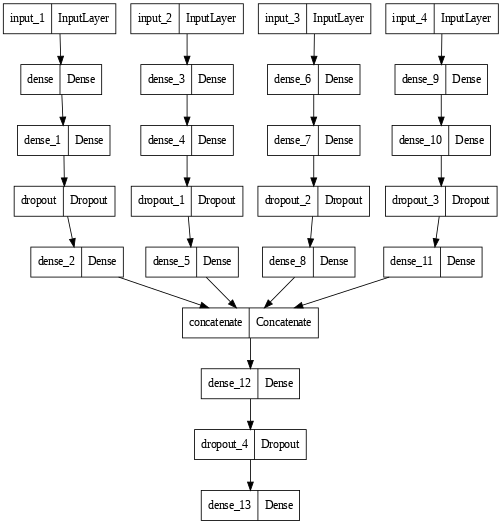

In [ ]:
utils.plot_model(model_01, dpi=60)

In [ ]:
model_01.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                              

Epoch 1/20
67/67 [==============================] - 7s 70ms/step - loss: 0.2951 - F1Score: 0.8986 - val_loss: 0.2831 - val_F1Score: 0.9211
Epoch 2/20
67/67 [==============================] - 6s 83ms/step - loss: 0.2914 - F1Score: 0.8986 - val_loss: 0.2814 - val_F1Score: 0.9211
Epoch 3/20
67/67 [==============================] - 4s 67ms/step - loss: 0.2876 - F1Score: 0.8986 - val_loss: 0.2797 - val_F1Score: 0.9211
Epoch 4/20
67/67 [==============================] - 4s 62ms/step - loss: 0.2795 - F1Score: 0.8986 - val_loss: 0.2781 - val_F1Score: 0.9211
Epoch 5/20
67/67 [==============================] - 5s 72ms/step - loss: 0.2819 - F1Score: 0.8986 - val_loss: 0.2766 - val_F1Score: 0.9211
Epoch 6/20
67/67 [==============================] - 5s 70ms/step - loss: 0.2767 - F1Score: 0.8986 - val_loss: 0.2752 - val_F1Score: 0.9211
Epoch 7/20
67/67 [==============================] - 4s 61ms/step - loss: 0.2711 - F1Score: 0.8986 - val_loss: 0.2735 - val_F1Score: 0.9211
Epoch 8/20
67/67 [=========

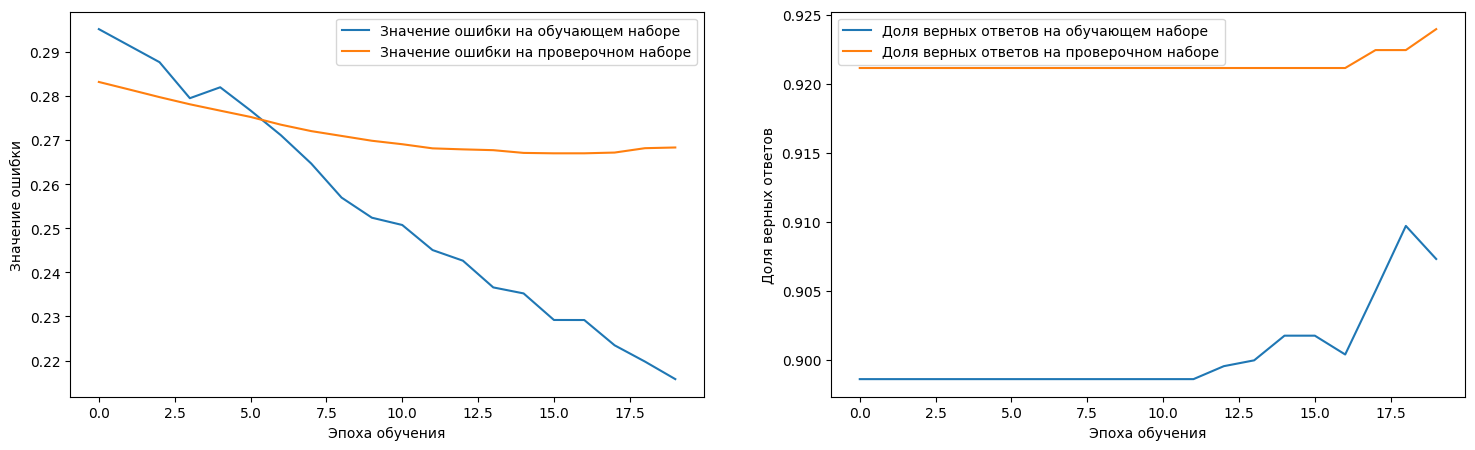

In [ ]:
model_01.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_01.fit([x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01],
                           y_train_01,
                           shuffle=True,
                           batch_size=16,
                           epochs=20,
                           validation_split=0.25,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        # print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
        #                                                                        100. * cm[cls, cls_pred],
        #                                                                        class_labels[cls_pred],
        #                                                                        msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
# Функция оценки результатов и вывода оценки

def eval_net(model, x_train, y_train, y_scaler = None, n = 500, limit = 3.):

    pred = model.predict(x_train)             # Предсказание на тренировочной выборке
    if y_scaler:                              # Если есть нормирование - то денормировать
        pred = y_scaler.inverse_transform(pred)

    print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train), '\n')

    for i in range(n):
        print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[i, 0],
                                                                                                    pred[i, 0],
                                                                                                    abs(y_train[i, 0] - pred[i, 0])))
    # Построение картинки разброса предсказанных и верных значений зарплаты
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(y_train, pred)                 # Отрисовка точечного графика
    ax.set_xlim(0, limit)                     # Пределы по x, y
    ax.set_ylim(0, limit)
    ax.plot(plt.xlim(), plt.ylim(), 'r')      # Отрисовка диагональной линии
    plt.xlabel('Правильные значения')
    plt.ylabel('Предсказания')
    plt.grid()
    plt.show()

In [ ]:
# eval_net(model_final, [x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01],
#                            y_train)

45/45 [==============================] - 1s 12ms/step


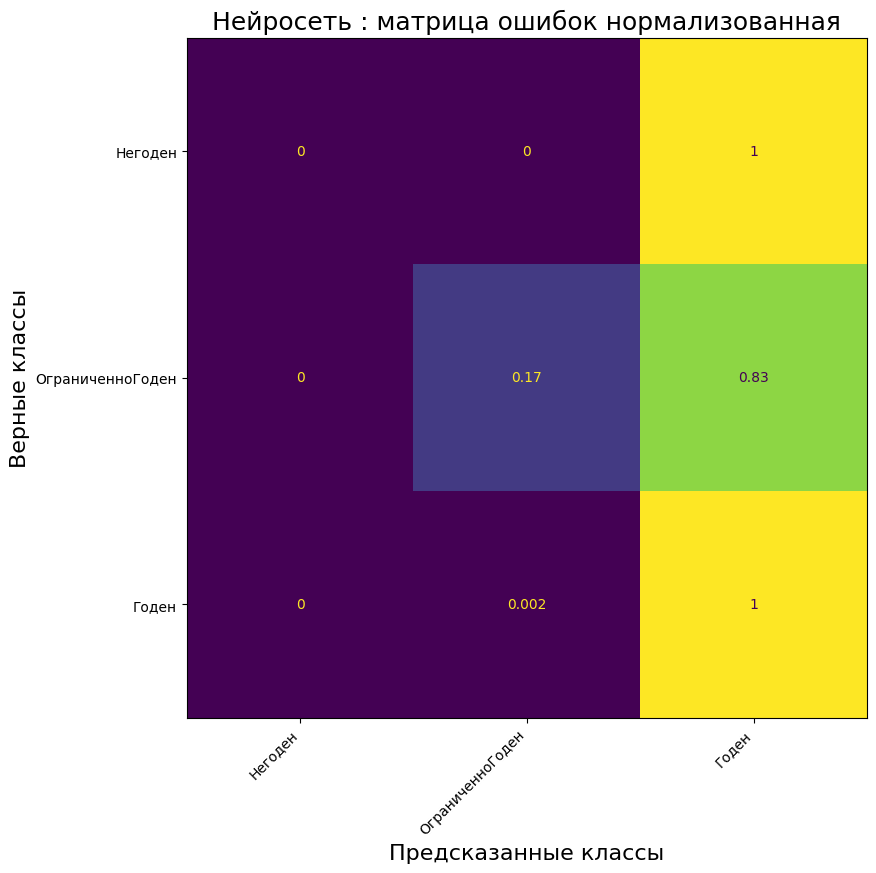

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  39%


In [ ]:
eval_model(model_01, [x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01],
                           y_train_01, class_labels = CLASS_DICT)

In [ ]:
# Пример предсказания

# обновляем номера индексов
dffix6=dffix5_cut.reset_index(drop=True)
# print (dffix6.shape)
indexes_0 = dffix6.loc[dffix6['ЗаключениеМК'] == 'Негоден'].index.tolist()
indexes_1 = dffix6.loc[dffix6['ЗаключениеМК'] == 'ОграниченноГоден'].index.tolist()
indexes_2 = dffix6.loc[dffix6['ЗаключениеМК'] == 'Годен'].index.tolist()
# print (indexes)

n_0 = random.choice(indexes_0)
n_1 = random.choice(indexes_1)
n_2 = random.choice(indexes_2)


y_pred = model_01.predict([x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01])
# print ('Предсказанный вектор: ', y_pred[n])
# print ('Реальный вектор: ', y_train_01[n])

y = np.argmax(y_pred, axis=-1)
# print ('Предсказанный класс: ', y[n])
# print ('Реальный класс: ', y_data_01[n])

df_pred = pd.DataFrame({'Реальное заключение': ['Негоден', 'ОграниченноГоден', 'Годен'],
                   'Реальный вектор': [y_train_01[n_0], y_train_01[n_1], y_train_01[n_2]],
                   'Реальный класс': [y_data_01[n_0], y_data_01[n_1], y_data_01[n_2]],
                   'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                   'Предсказанный класс': [y[n_0], y[n_1], y[n_2]],
                   })
df_pred

45/45 [==============================] - 1s 15ms/step


,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Негоден,"[1.0, 0.0, 0.0]",0,"[0.043690175, 0.0856892, 0.8706206]",2
1,ОграниченноГоден,"[0.0, 1.0, 0.0]",1,"[0.021202143, 0.19713978, 0.781658]",2
2,Годен,"[0.0, 0.0, 1.0]",2,"[0.00085455045, 0.003562913, 0.9955825]",2


# 2. Этап. Эксперимент с урезанным датасетом для лучшей балансировки классов

In [ ]:
dffix6 = dffix5_cut[:500]
print (dffix6.shape)
dffix6.ЗаключениеМК.value_counts()

(500, 5)


Годен               443
ОграниченноГоден     51
Негоден               6
Name: ЗаключениеМК, dtype: int64

In [ ]:
COL_DB    = dffix6.columns.get_loc('Возраст')
COL_MKB    = dffix6.columns.get_loc('Свод_МКБ')
COL_HARM   = dffix6.columns.get_loc('Вредность')
COL_PROF   = dffix6.columns.get_loc('Профессия')


# CLASS_COUNT = dffix6_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix6.ЗаключениеМК.value_counts()
print (CLASS_LIST)


Годен               443
ОграниченноГоден     51
Негоден               6
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение даты рождения для выборки
DB_list_2 = extract_DB(dffix6.values)

x_train_age_02 = np.zeros ((len(dffix6), age_class[0]))

# Вычисление счетчиков для данных разбиения
for class_desc in [age_class]:

    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

# Преобразование последовательностей индексов
for A in range(len(DB_list_2)):
  # print (age_years_to_ohe(extract_age(A)))
  x_train_age_02[A,:] = np.array(age_years_to_ohe(DB_list_2[A]))

In [ ]:
# Извлечение текстов о профессии для выборки
prof_text_2 = extract_prof_text(dffix6.values)

tokenizer.fit_on_texts(prof_text_2)
items = list(tokenizer.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq_2 = tokenizer.texts_to_sequences(prof_text_2)

# Преобразование последовательностей индексов в bag of words
x_train_prof_02 = tokenizer.sequences_to_matrix(prof_seq_2)

In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_2 = extract_harm_text(dffix6.values)

tokenizer_harm.fit_on_texts(harm_text_2)
items_harm = list(tokenizer_harm.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_2 = tokenizer_harm.texts_to_sequences(harm_text_2)

# Преобразование последовательностей индексов в bag of words
x_train_harm_02 = tokenizer_harm.sequences_to_matrix(harm_seq_2)

In [ ]:
# Извлечение текстов о МКБ для выборки
MKB_text_2 = extract_MKB_text(dffix6.values)

tokenizer_MKB.fit_on_texts(MKB_text_2)
items_MKB = list(tokenizer_MKB.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
MKB_seq_2 = tokenizer_MKB.texts_to_sequences(MKB_text_2)

# Преобразование последовательностей индексов в bag of words
x_train_MKB_02 = tokenizer_MKB.sequences_to_matrix(MKB_seq_2)

In [ ]:
y_data_02, y_train_02 = Y_to_OHE(dffix6)

In [ ]:
print('Размер выборки возраста', x_train_age_02.shape)
print('Размер выборки профессии', x_train_prof_02.shape)
print('Размер выборки вредности', x_train_harm_02.shape)
print('Размер выборки МКБ', x_train_MKB_02.shape)
print('Размер выборки Заключения', y_train_02.shape)

Размер выборки возраста (500, 11)
Размер выборки профессии (500, 1000)
Размер выборки вредности (500, 200)
Размер выборки МКБ (500, 150)
Размер выборки Заключения (500, 3)


In [ ]:
input1 = Input((x_train_age_02.shape[1],))
input2 = Input((x_train_prof_02.shape[1],))
input3 = Input((x_train_harm_02.shape[1],))
input4 = Input((x_train_MKB_02.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(2**11, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1024, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(128, activation="relu")(x2)

x3 = input3                               # Ветка 3
x3 = Dense(256, activation="relu")(x3)
x3 = Dense(512, activation="relu")(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(128, activation="relu")(x3)

x4 = input4                               # Ветка 4
x4 = Dense(256, activation="relu")(x4)
x4 = Dense(512, activation="relu")(x4)
x4 = Dropout(0.3)(x4)
x4 = Dense(128, activation="relu")(x4)

x = concatenate([x1, x2, x3, x4])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.3)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_02 = Model((input1, input2, input3, input4), x)

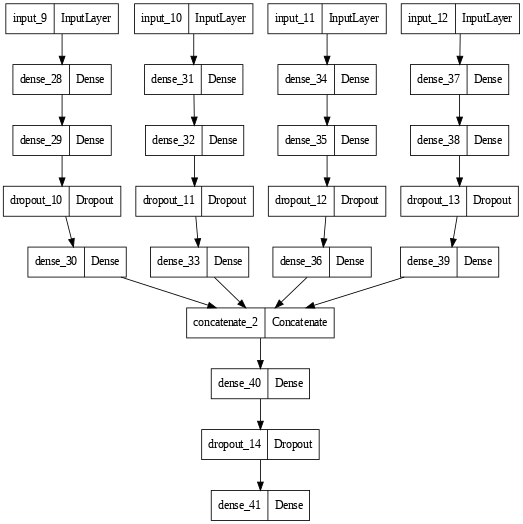

In [ ]:
utils.plot_model(model_02, dpi=60)

In [ ]:
model_02.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1000)]       0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 150)]        0           []                               
                                                                                            

Epoch 1/20
24/24 [==============================] - 5s 80ms/step - loss: 1.0399 - F1Score: 0.5816 - val_loss: 1.0078 - val_F1Score: 0.0000e+00
Epoch 2/20
24/24 [==============================] - 2s 71ms/step - loss: 0.9824 - F1Score: 0.0000e+00 - val_loss: 0.9459 - val_F1Score: 0.0000e+00
Epoch 3/20
24/24 [==============================] - 2s 97ms/step - loss: 0.9200 - F1Score: 0.0053 - val_loss: 0.8771 - val_F1Score: 0.0000e+00
Epoch 4/20
24/24 [==============================] - 2s 99ms/step - loss: 0.8532 - F1Score: 0.0512 - val_loss: 0.8044 - val_F1Score: 0.0312
Epoch 5/20
24/24 [==============================] - 2s 67ms/step - loss: 0.7828 - F1Score: 0.4381 - val_loss: 0.7283 - val_F1Score: 0.7713
Epoch 6/20
24/24 [==============================] - 2s 68ms/step - loss: 0.7093 - F1Score: 0.7677 - val_loss: 0.6548 - val_F1Score: 0.8584
Epoch 7/20
24/24 [==============================] - 2s 68ms/step - loss: 0.6377 - F1Score: 0.8198 - val_loss: 0.5853 - val_F1Score: 0.8584
Epoch 8/20


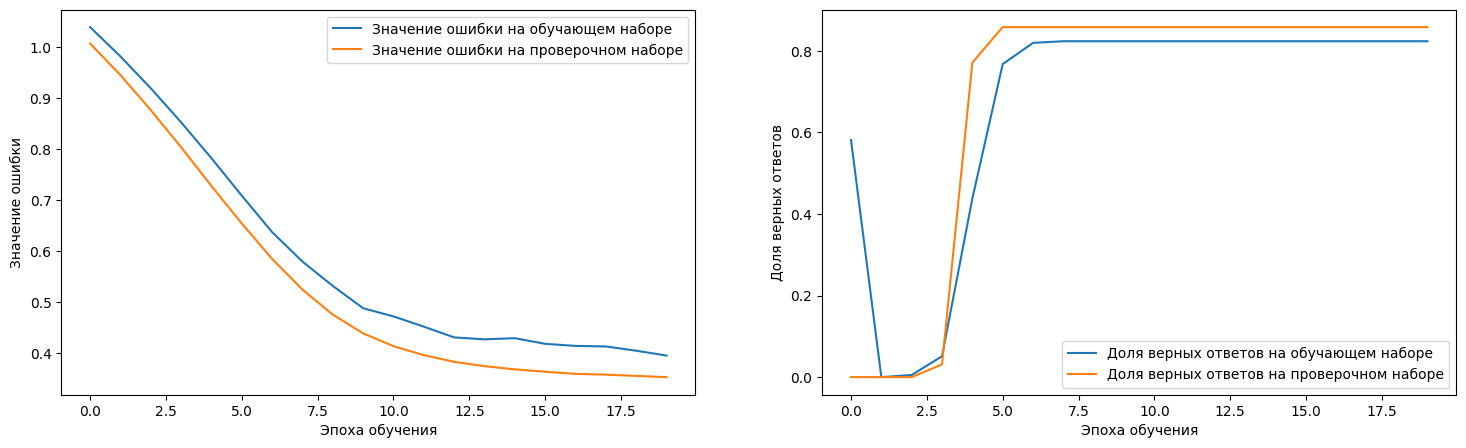

In [ ]:
model_02.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_02.fit([x_train_age_02, x_train_prof_02, x_train_harm_02, x_train_MKB_02],
                           y_train_02,
                           shuffle=True,
                           batch_size=16,
                           epochs=20,
                           validation_split=0.25,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

16/16 [==============================] - 0s 12ms/step


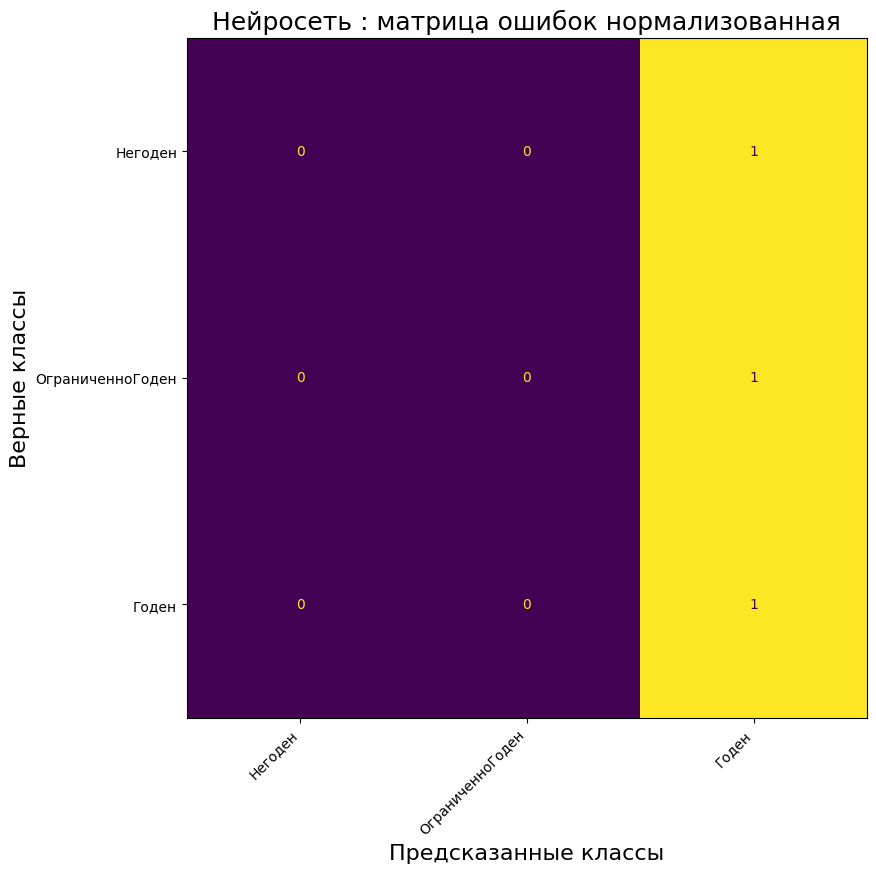

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  33%


In [ ]:
eval_model(model_02, [x_train_age_02, x_train_prof_02, x_train_harm_02, x_train_MKB_02],
                           y_train_02, class_labels = CLASS_DICT)

In [ ]:
# Пример предсказания

# обновляем номера индексов
dffix6_cut=dffix6.reset_index(drop=True)

indexes_0 = dffix6_cut.loc[dffix6_cut['ЗаключениеМК'] == 'Негоден'].index.tolist()
indexes_1 = dffix6_cut.loc[dffix6_cut['ЗаключениеМК'] == 'ОграниченноГоден'].index.tolist()
indexes_2 = dffix6_cut.loc[dffix6_cut['ЗаключениеМК'] == 'Годен'].index.tolist()

n_0 = random.choice(indexes_0)
n_1 = random.choice(indexes_1)
n_2 = random.choice(indexes_2)


y_pred = model_02.predict([x_train_age_02, x_train_prof_02, x_train_harm_02, x_train_MKB_02])

y = np.argmax(y_pred, axis=-1)

df_pred_02 = pd.DataFrame({'Реальное заключение': ['Негоден', 'ОграниченноГоден', 'Годен'],
                   'Реальный вектор': [y_train_02[n_0], y_train_02[n_1], y_train_02[n_2]],
                   'Реальный класс': [y_data_02[n_0], y_data_02[n_1], y_data_02[n_2]],
                   'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                   'Предсказанный класс': [y[n_0], y[n_1], y[n_2]],
                   })
df_pred_02

16/16 [==============================] - 0s 19ms/step


,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Негоден,"[1.0, 0.0, 0.0]",0,"[0.033108525, 0.09254655, 0.8743449]",2
1,ОграниченноГоден,"[0.0, 1.0, 0.0]",1,"[0.019967921, 0.09616396, 0.883868]",2
2,Годен,"[0.0, 0.0, 1.0]",2,"[0.027857628, 0.10975065, 0.8623916]",2


# 3. Этап. Эксперимент со значищими данными в виде текстового представления диагнозов вместо МКБ

In [ ]:
dffix7 = dffix3[['ЗаключениеМК',
'Вредность',
'Психиатрия Наркология1 Диагноз Представление1',
'Офтальмология1_ДиагнозПредставление1',
'Оториноларингология1_ДиагнозПредставление1',
'Гинекология1_ДиагнозПредставление1',
'Стоматология1_ДиагнозПредставление1',
'Дерматовенерология1_ДиагнозПредставление1',
'Неврология1_ДиагнозПредставление1',
'Терапия1_ДиагнозПредставление1',
'Хирургия1_ДиагнозПредставление1',
'Офтальмология1_ДиагнозПредставление2',
'Терапия2_ДиагнозПредставление1',
]]

print (dffix7.shape)

(1571, 13)


In [ ]:
# Обобщенный диагноз
dffix7['Свод_Диагноз'] = (dffix7['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ','
 + dffix7['Офтальмология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Оториноларингология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Гинекология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Стоматология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Дерматовенерология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Неврология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Терапия1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Хирургия1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Офтальмология1_ДиагнозПредставление2'].map(str)+ ','
 + dffix7['Терапия2_ДиагнозПредставление1'].map(str))

<ipython-input-58-6df66ed6385d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix7['Свод_Диагноз'] = (dffix7['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ','


In [ ]:
dffix7_simple = dffix7[['ЗаключениеМК',
                        'Вредность',
                        'Свод_Диагноз',
]]

print (dffix7_simple.shape)
dffix7_simple

(1571, 3)


,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,,,,Общий медиц..."
3,Годен,11.1,",Общий медицинский осмотр,Общий медицинский ос..."
4,ОграниченноГоден,11.1,",Астигматизм,Общий медицинский осмотр,,Общий м..."
...,...,...,...
1961,Годен,"4.4,4.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."
1962,Годен,4.4,"Общий медицинский осмотр,,Общий медицинский ос..."
1972,Годен,3.1.8.2,"Общий медицинский осмотр,Общий медицинский осм..."
1973,Годен,"4.2.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."


In [ ]:
list_of_Diag = dffix7_simple['Свод_Диагноз'].tolist()
print (list_of_Diag)


['Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,,,,,,', 'Общий медицинский осмотр,Общий медицинский осмотр,,,,Общий медицинский осмотр,Общий медицинский осмотр,Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности,,,', 'Общий медицинский осмотр,Миопия,,,,Общий медицинский осмотр,,Общий медицинский осмотр,,,', ',Общий медицинский осмотр,Общий медицинский осмотр,,Общий медицинский осмотр,,Общий медицинский осмотр,Общий медицинский осмотр,,,', ',Астигматизм,Общий медицинский осмотр,,Общий медицинский осмотр,,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,,', ',Астигматизм,Общий медицинский осмотр,,Общий медицинский осмотр,,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Амблиопия вследствие анопсии,Общий медицинский осмотр', ',Миопия,Общий медицинский осмотр,,Общий медицинский осмотр,,Общий м

In [ ]:
print (purify(list_of_Diag[1]))

Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности


In [ ]:
clearlist=[]
for A in list_of_Diag:
  clearlist.append(purify(A))
print (clearlist)



['Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр', 'Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности', 'Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский осмотр', 'Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр', 'Астигматизм,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр', 'Астигматизм,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Амблиопия вследствие анопсии,Общий медицинский осмотр', 'Миопия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский 

In [ ]:
dffix7_simple['Свод_Диагноз'] = dffix7_simple['Свод_Диагноз'].replace(to_replace=dffix7_simple['Свод_Диагноз'].tolist(), value=clearlist)

dffix8=dffix7_simple[['ЗаключениеМК',
                        'Вредность',
                        'Свод_Диагноз']]

dffix8

<ipython-input-64-12a821e36235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix7_simple['Свод_Диагноз'] = dffix7_simple['Свод_Диагноз'].replace(to_replace=dffix7_simple['Свод_Диагноз'].tolist(), value=clearlist)


,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
1961,Годен,"4.4,4.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."
1962,Годен,4.4,"Общий медицинский осмотр,Общий медицинский осм..."
1972,Годен,3.1.8.2,"Общий медицинский осмотр,Общий медицинский осм..."
1973,Годен,"4.2.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."


In [ ]:
dffix8_simple = dffix8[dffix8['Свод_Диагноз']!='']
dffix8_simple

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
1961,Годен,"4.4,4.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."
1962,Годен,4.4,"Общий медицинский осмотр,Общий медицинский осм..."
1972,Годен,3.1.8.2,"Общий медицинский осмотр,Общий медицинский осм..."
1973,Годен,"4.2.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."


In [ ]:
# dffix7_simple.to_excel('ppfix7.xlsx', index=False)

In [ ]:
# Настройка номеров столбцов

# CLASS_DICT ={'Негоден':0, 'ОграниченноГоден':1, 'Годен':2}

COL_DIAG    = dffix8_simple.columns.get_loc('Свод_Диагноз')
COL_HARM   = dffix8_simple.columns.get_loc('Вредность')
# CLASS_COUNT = dffix8_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix8_simple.ЗаключениеМК.value_counts()
print (CLASS_LIST)

Годен               1284
ОграниченноГоден     125
Негоден               11
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_3 = extract_harm_text(dffix8_simple.values)

tokenizer_harm.fit_on_texts(harm_text_3)
items_harm = list(tokenizer_harm.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_3 = tokenizer_harm.texts_to_sequences(harm_text_3)

# Преобразование последовательностей индексов в bag of words
x_train_harm_03 = tokenizer_harm.sequences_to_matrix(harm_seq_3)

In [ ]:
dffix8_simple.Вредность.value_counts()

23                                           174
4.2.5                                        106
25,25                                         40
11.1                                          36
9                                             34
                                            ... 
1.50,4.2.5,6,6.1,6.2,9,11,11.1,11.4            1
1.1,1.29.1,1.29.2,1.30.1,3.1.8.2,5.1,1.15      1
1.37.1,4.8,15                                  1
4.3.1,4.4,6.1,11.1,18.1                        1
4.2.5,6.1                                      1
Name: Вредность, Length: 359, dtype: int64

In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_3 = extract_Diag_text(dffix8_simple.values)

tokenizer_Diag.fit_on_texts(Diag_text_3)
items_Diag = list(tokenizer_Diag.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_3 = tokenizer_Diag.texts_to_sequences(Diag_text_3)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_03 = tokenizer_Diag.sequences_to_matrix(Diag_seq_3)

In [ ]:
dffix8_simple.Свод_Диагноз.value_counts()

Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                              261
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                     187
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                       147
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                                                 64
Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский о

In [ ]:
print(items_Diag[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_Diag))              # Длина словаря

[('unknown', 1), ('Общий медицинский осмотр', 2), ('Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности', 3), ('Миопия', 4), ('Астигматизм', 5), ('Гиперметропия', 6), ('Хронический поверхностный гастрит', 7), ('Амблиопия вследствие анопсии', 8), ('Другие расстройства вегетативной [автономной] нервной системы', 9), ('Начальная старческая катаракта', 10), ('Пресбиакузис', 11), ('Тремор неуточненный', 12), ('Адгезивная болезнь среднего уха', 13), ('Церебральный атеросклероз', 14), ('Односторонняя или неуточненная паховая грыжа без непроходимости или гангрены', 15), ('Последствия травм', 16), (' захватывающих несколько областей тела', 17), ('Нейросенсорная потеря слуха односторонняя с нормальным слухом на противоположном ухе', 18), ('Атрофия зрительного нерва', 19), ('Остеохондроз позвоночника у взрослых', 20), ('Лейомиома матки', 21), ('Инсулиннезависимый сахарный диабет с неуточненными осложнениями', 22), ('Гастрит неуто

In [ ]:
# Пример текста о вредности и диагнозе
print(dffix8_simple.values[151])
print(Diag_text_3[151])

['Годен' '4.2.5'
 'Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр']
['Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр']


In [ ]:
y_data_03, y_train_03 = Y_to_OHE(dffix8_simple)

In [ ]:
print('Размер выборки вредности', x_train_harm_03.shape)
print('Размер выборки Диагноза', x_train_Diag_03.shape)
print('Размер выборки Заключения', y_train_03.shape)

Размер выборки вредности (1420, 1000)
Размер выборки Диагноза (1420, 1000)
Размер выборки Заключения (1420, 3)


In [ ]:
input1 = Input((x_train_harm_03.shape[1],))
input2 = Input((x_train_Diag_03.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(1024, activation="relu")(x1)
x1 = Dense(512, activation="relu")(x1)
x1 = Dropout(0.3)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1024, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(128, activation="relu")(x2)

x = concatenate([x1, x2])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.2)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_03 = Model((input1, input2), x)

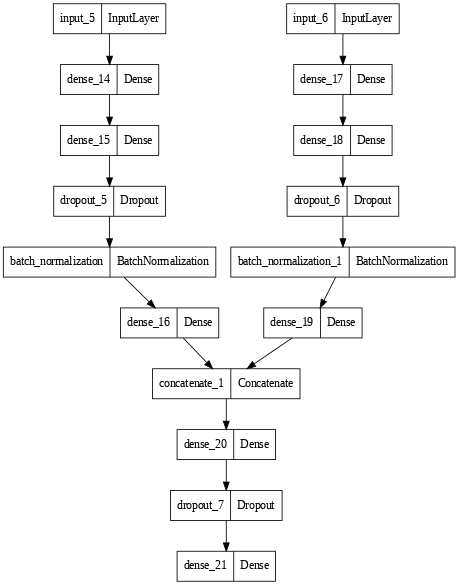

In [ ]:
utils.plot_model(model_03, dpi=60)

In [ ]:
model_03.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 1024)         1025024     ['input_5[0][0]']                
                                                                                                  
 dense_17 (Dense)               (None, 1024)         1025024     ['input_6[0][0]']                
                                                                                            

Epoch 1/20
63/63 [==============================] - 7s 52ms/step - loss: 0.2433 - F1Score: 0.9092 - val_loss: 0.2496 - val_F1Score: 0.9274
Epoch 2/20
63/63 [==============================] - 3s 43ms/step - loss: 0.2265 - F1Score: 0.9095 - val_loss: 0.2479 - val_F1Score: 0.9274
Epoch 3/20
63/63 [==============================] - 3s 45ms/step - loss: 0.2284 - F1Score: 0.9020 - val_loss: 0.2479 - val_F1Score: 0.9274
Epoch 4/20
63/63 [==============================] - 4s 61ms/step - loss: 0.2241 - F1Score: 0.9064 - val_loss: 0.2476 - val_F1Score: 0.9249
Epoch 5/20
63/63 [==============================] - 3s 54ms/step - loss: 0.2139 - F1Score: 0.9080 - val_loss: 0.2495 - val_F1Score: 0.9227
Epoch 6/20
63/63 [==============================] - 3s 44ms/step - loss: 0.2156 - F1Score: 0.9009 - val_loss: 0.2480 - val_F1Score: 0.9227
Epoch 7/20
63/63 [==============================] - 3s 46ms/step - loss: 0.2097 - F1Score: 0.9100 - val_loss: 0.2495 - val_F1Score: 0.9227
Epoch 8/20
63/63 [=========

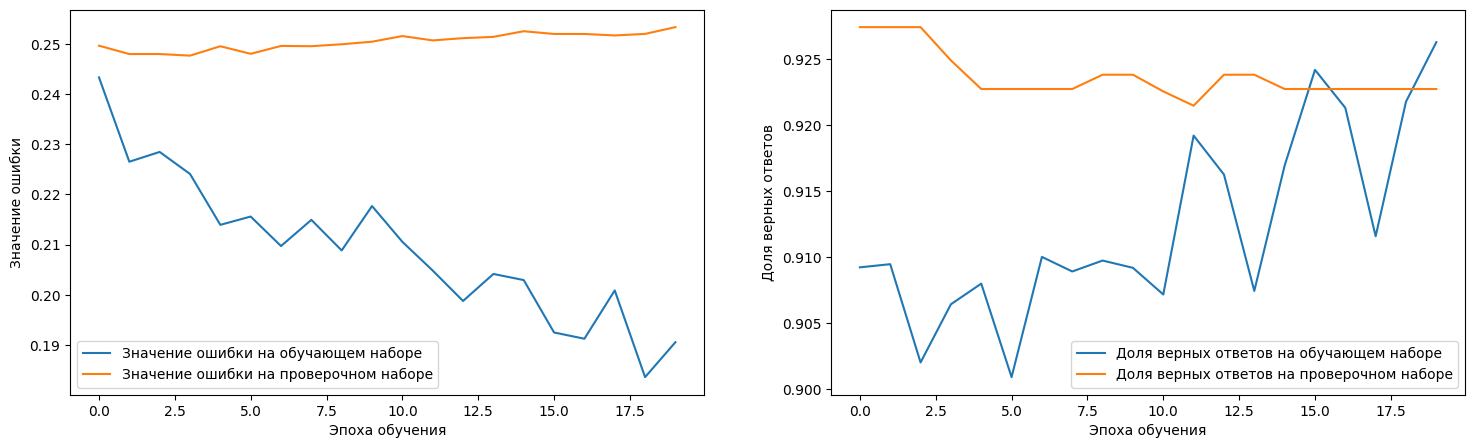

In [ ]:
model_03.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_03.fit([x_train_harm_03, x_train_Diag_03],
                           y_train_03,
                           shuffle=True,
                           batch_size=16,
                           epochs=20,
                           validation_split=0.3,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
# eval_net(model_3, [x_train_harm_03, x_train_Diag_03],
#                            y_train_03)

45/45 [==============================] - 1s 11ms/step


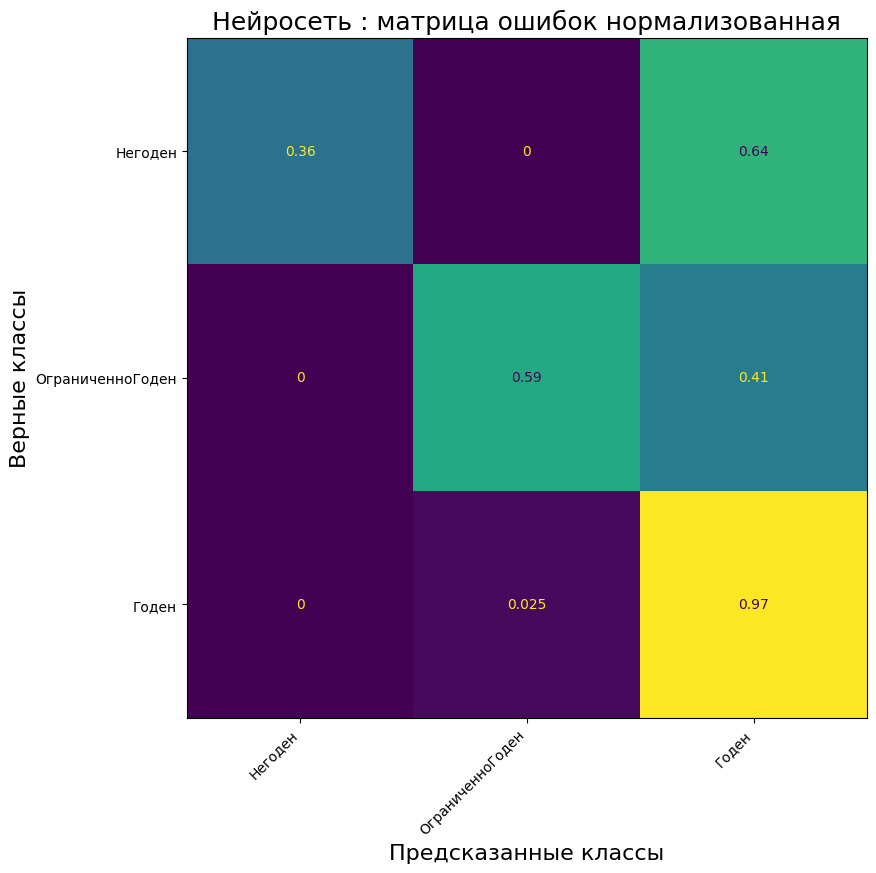

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  64%


In [ ]:
eval_model(model_03, [x_train_harm_03, x_train_Diag_03],
                           y_train_03, class_labels = CLASS_DICT)

# 4. Этап. Эксперимент с расширением датасетана основеприказа №29Н

In [ ]:
# Пример предсказания

# обновляем номера индексов
dffix8_cut=dffix8_simple.reset_index(drop=True)

indexes_0 = dffix8_cut.loc[dffix8_cut['ЗаключениеМК'] == 'Негоден'].index.tolist()
indexes_1 = dffix8_cut.loc[dffix8_cut['ЗаключениеМК'] == 'ОграниченноГоден'].index.tolist()
indexes_2 = dffix8_cut.loc[dffix8_cut['ЗаключениеМК'] == 'Годен'].index.tolist()

n_0 = random.choice(indexes_0)
n_1 = random.choice(indexes_1)
n_2 = random.choice(indexes_2)


y_pred = model_03.predict([x_train_harm_03, x_train_Diag_03])

y = np.argmax(y_pred, axis=-1)

df_pred_03 = pd.DataFrame({'Реальное заключение': ['Негоден', 'ОграниченноГоден', 'Годен'],
                   'Реальный вектор': [y_train_03[n_0], y_train_03[n_1], y_train_03[n_2]],
                   'Реальный класс': [y_data_03[n_0], y_data_03[n_1], y_data_03[n_2]],
                   'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                   'Предсказанный класс': [y[n_0], y[n_1], y[n_2]],
                   })
df_pred_03

45/45 [==============================] - 1s 14ms/step


,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Негоден,"[1.0, 0.0, 0.0]",0,"[0.36210266, 0.120565966, 0.5173314]",2
1,ОграниченноГоден,"[0.0, 1.0, 0.0]",1,"[0.00581406, 0.56303245, 0.43115348]",1
2,Годен,"[0.0, 0.0, 1.0]",2,"[0.16941945, 0.062860645, 0.76771986]",2


Добавление данных на основании Приказа 29н и 302н для расширения группы "Негоден"
Данные приняты по вредным факторам и факторам трудового процесса соответсвующие категориям 4-5 и 6-27 на основании Приказа 29н

In [ ]:
df_add = pd.read_csv('/content/drive/MyDrive/internsheep1/Pr29_1.csv')

In [ ]:
df_add

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Негоден,6.1,"Грыжи, препятствующие работе и имеющие наклонн..."
1,Негоден,6.1,Хронические заболевания периферической нервной...
2,Негоден,6.1,Хроническая ишемия мозга (дисциркуляторная энц...
3,Негоден,6.1,Заболевания любой этиологии вызывающие нарушен...
4,Негоден,6.1,Нарушение функции вестибулярного анализатора л...
...,...,...,...
469,Негоден,5.2.1,"Нарушение цветоощущения, если цвет несет инфор..."
470,Негоден,5.2.1,Лагофтальм.
471,Негоден,5.2.1,Хронические воспалительные и аллергические заб...
472,Негоден,5.2.1,"Заболевания зрительного нерва, сетчатки."


In [ ]:
list_against = df_add['Свод_Диагноз'].tolist()
print (list_against)


['Грыжи, препятствующие работе и имеющие наклонность к ущемлению', 'Хронические заболевания периферической нервной системы с обострениями 3 и более раза за календарный год', 'Хроническая ишемия мозга (дисциркуляторная энцефалопатия)', 'Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата, синдромы головокружения, нистагм (болезнь Меньера, лабиринтиты, вестибулярные кризы любой этиологии и др.)', 'Нарушение функции вестибулярного анализатора любой этиологии', 'Стойкое понижение слуха (3 и более месяца) любой этиологии одно- и двустороннее (острота слуха: шепотная речь не менее 3 м), за исключением отсутствия слуха, выраженных и значительно выраженных нарушений слуха (глухота и III, IV степень тугоухости) у лиц, прошедших профессиональное обучение, в том числе обучение безопасным методам и приемам выполнения работ', 'острота зрения без коррекции ниже 0,5 на одном глазу и ниже 0,2 - на другом;', 'ограничение поля зрения более чем 20°;', 'не поддающиеся лечению 

In [ ]:
def clean_string(text):
    # удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))

    # удаление лишних пробелов
    # text = ' '.join(text.split())

    # приведение к нижнему регистру
    # text = text.lower()

    return text

In [ ]:
print (clean_string(list_against[0]))
print (len(list_against))

Грыжи препятствующие работе и имеющие наклонность к ущемлению
474


In [ ]:
clearlist=[]
for A in list_against:
  clearlist.append(clean_string(A))
print (clearlist)



['Грыжи препятствующие работе и имеющие наклонность к ущемлению', 'Хронические заболевания периферической нервной системы с обострениями 3 и более раза за календарный год', 'Хроническая ишемия мозга дисциркуляторная энцефалопатия', 'Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата синдромы головокружения нистагм болезнь Меньера лабиринтиты вестибулярные кризы любой этиологии и др', 'Нарушение функции вестибулярного анализатора любой этиологии', 'Стойкое понижение слуха 3 и более месяца любой этиологии одно и двустороннее острота слуха шепотная речь не менее 3 м за исключением отсутствия слуха выраженных и значительно выраженных нарушений слуха глухота и III IV степень тугоухости у лиц прошедших профессиональное обучение в том числе обучение безопасным методам и приемам выполнения работ', 'острота зрения без коррекции ниже 05 на одном глазу и ниже 02  на другом', 'ограничение поля зрения более чем 20°', 'не поддающиеся лечению дакриоциститы и неизлечимое 

In [ ]:
df_add['Свод_Диагноз'] = df_add['Свод_Диагноз'].replace(to_replace=df_add['Свод_Диагноз'].tolist(), value=clearlist)

df_add_1=df_add[['ЗаключениеМК',
                        'Вредность',
                        'Свод_Диагноз']]

df_add_1

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Негоден,6.1,Грыжи препятствующие работе и имеющие наклонно...
1,Негоден,6.1,Хронические заболевания периферической нервной...
2,Негоден,6.1,Хроническая ишемия мозга дисциркуляторная энце...
3,Негоден,6.1,Заболевания любой этиологии вызывающие нарушен...
4,Негоден,6.1,Нарушение функции вестибулярного анализатора л...
...,...,...,...
469,Негоден,5.2.1,Нарушение цветоощущения если цвет несет информ...
470,Негоден,5.2.1,Лагофтальм
471,Негоден,5.2.1,Хронические воспалительные и аллергические заб...
472,Негоден,5.2.1,Заболевания зрительного нерва сетчатки


In [ ]:
# Объединим данные как есть
dffix9 = pd.concat([dffix8_cut, df_add_1], ignore_index=True)

dffix9

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
1889,Негоден,5.2.1,Нарушение цветоощущения если цвет несет информ...
1890,Негоден,5.2.1,Лагофтальм
1891,Негоден,5.2.1,Хронические воспалительные и аллергические заб...
1892,Негоден,5.2.1,Заболевания зрительного нерва сетчатки


In [ ]:
# Настройка номеров столбцов

COL_DIAG    = dffix9.columns.get_loc('Свод_Диагноз')
COL_HARM   = dffix9.columns.get_loc('Вредность')
# CLASS_COUNT = dffix14['ЗаключениеМК'].nunique()
CLASS_LIST = dffix9.ЗаключениеМК.value_counts()
print (CLASS_LIST)

Годен               1284
Негоден              485
ОграниченноГоден     125
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_5 = extract_Diag_text(dffix9.values)

tokenizer_Diag.fit_on_texts(Diag_text_5)
items_Diag = list(tokenizer_Diag.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_5 = tokenizer_Diag.texts_to_sequences(Diag_text_5)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_05 = tokenizer_Diag.sequences_to_matrix(Diag_seq_5)

print(items_Diag[:50])
print("Размер словаря", len(items_Diag))              # Длина словаря

[('unknown', 1), ('Общий медицинский осмотр', 2), ('Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности', 3), ('Миопия', 4), ('Астигматизм', 5), ('Гиперметропия', 6), ('Хронический поверхностный гастрит', 7), ('Беременность и период лактации', 8), ('Нарушение функции вестибулярного анализатора любой этиологии', 9), ('Амблиопия вследствие анопсии', 10), ('Другие расстройства вегетативной [автономной] нервной системы', 11), ('Выраженные расстройства вегетативной автономной нервной системы', 12), ('Начальная старческая катаракта', 13), ('Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата синдромы головокружения нистагм болезнь Меньера лабиринтиты вестибулярные кризы любой этиологии и др', 14), ('Пресбиакузис', 15), ('Тремор неуточненный', 16), ('Хронические рецидивирующие заболевания кожи с частотой обострения 4 раза и более за календарный год', 17), ('Адгезивная болезнь среднего уха', 18), (

In [ ]:
# Проверка получившихся данных
n = 1421
print(Diag_text_5[n])                       # Диагноз в тексте
print(Diag_seq_5[n])                        # Диагноз в индексах слов
print(x_train_Diag_05[n][0:100])          # Диагноз в bag of words

['Хронические заболевания периферической нервной системы с обострениями 3 и более раза за календарный год']
[39]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
dffix9.Свод_Диагноз.value_counts()

Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                 261
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                        187
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                          147
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                                                    64
Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий м

In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_5 = extract_harm_text(dffix9.values)

tokenizer_harm.fit_on_texts(harm_text_5)
items_harm = list(tokenizer_harm.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_5 = tokenizer_harm.texts_to_sequences(harm_text_5)

# Преобразование последовательностей индексов в bag of words
x_train_harm_05 = tokenizer_harm.sequences_to_matrix(harm_seq_5)

print(items_harm[:50])
print("Размер словаря", len(items_harm))              # Длина словаря

[('unknown', 1), ('6.1', 2), ('4.4', 3), ('5.1', 4), ('4.2.5', 5), ('23', 6), ('18.1', 7), ('9', 8), ('11.1', 9), ('6.2', 10), ('1.50', 11), ('15', 12), ('18.2', 13), ('6', 14), ('25', 15), ('4.7', 16), ('4.1', 17), ('1.30.1', 18), ('1.1', 19), ('4.3.1', 20), ('11.4', 21), ('4.3.2', 22), ('1.14.2', 23), ('4.8', 24), ('1.37.1', 25), ('1.29.2', 26), ('1.8.1.1', 27), ('17', 28), ('1.34.1', 29), ('4.5', 30), ('3.1.7', 31), ('27', 32), ('1.36.1', 33), ('12', 34), ('1.19.1', 35), ('13', 36), ('1.3', 37), ('1.29.1', 38), ('1.8.1.2', 39), ('1.39', 40), ('4.2.1', 41), ('3.4', 42), ('1.8.2.1', 43), ('18', 44), ('4.6', 45), ('11.3', 46), ('11', 47), ('8', 48), ('26', 49), ('1.18.3', 50)]
Размер словаря 99


In [ ]:
# Проверка получившихся данных
n = 1421
print(harm_text_5[n])                       # Диагноз в тексте
print(harm_seq_5[n])                        # Диагноз в индексах слов
print(x_train_harm_05[n][0:100])          # Диагноз в bag of words

['6.1']
[2]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Пример текста о вредности и диагнозе
print(dffix9.values[1421])

['Негоден' '6.1'
 'Хронические заболевания периферической нервной системы с обострениями 3 и более раза за календарный год']


In [ ]:
y_data_05, y_train_05 = Y_to_OHE(dffix9)

In [ ]:
print('Размер выборки вредности', x_train_harm_05.shape)
print('Размер выборки Диагноза', x_train_Diag_05.shape)
print('Размер выборки Заключения', y_train_05.shape)

Размер выборки вредности (1894, 1000)
Размер выборки Диагноза (1894, 1000)
Размер выборки Заключения (1894, 3)


In [ ]:
dffix9.Вредность.value_counts()

23                                   193
4.2.5                                109
18.1                                  66
11.1                                  50
25,25                                 40
                                    ... 
4.2.5,4.7,5.1,11.1                     1
11                                     1
1.36.1,4.3.2,4.4,4.7,5.1,6.1,11.1      1
4.7,5.1,11.1                           1
5.2.2                                  1
Name: Вредность, Length: 385, dtype: int64

In [ ]:
dffix9.ЗаключениеМК.value_counts()

Годен               1284
Негоден              485
ОграниченноГоден     125
Name: ЗаключениеМК, dtype: int64

In [ ]:
input1 = Input((x_train_harm_05.shape[1],))
input2 = Input((x_train_Diag_05.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(512, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1000, activation="relu")(x2)
x2 = Dense(1024, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(128, activation="relu")(x2)

x = concatenate([x1, x2])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.2)(x)
x = Dense(8, activation='relu')(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_05 = Model((input1, input2), x)

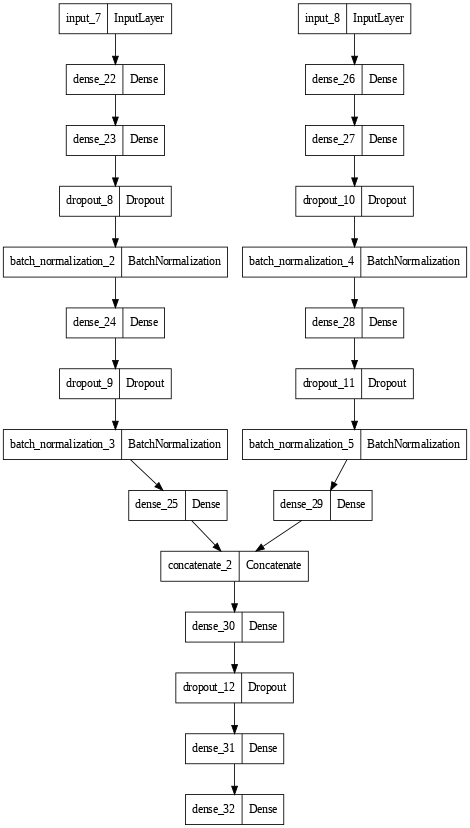

In [ ]:
utils.plot_model(model_05, dpi=60)

In [ ]:
model_05.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 512)          512512      ['input_7[0][0]']                
                                                                                                  
 dense_26 (Dense)               (None, 512)          512512      ['input_8[0][0]']                
                                                                                            

Epoch 1/20
95/95 [==============================] - 12s 88ms/step - loss: 0.5082 - accuracy: 0.8158 - val_loss: 1.2335 - val_accuracy: 0.0607
Epoch 2/20
95/95 [==============================] - 8s 79ms/step - loss: 0.4910 - accuracy: 0.8125 - val_loss: 1.2268 - val_accuracy: 0.0501
Epoch 3/20
95/95 [==============================] - 8s 87ms/step - loss: 0.4803 - accuracy: 0.8257 - val_loss: 1.2194 - val_accuracy: 0.0554
Epoch 4/20
95/95 [==============================] - 8s 83ms/step - loss: 0.4604 - accuracy: 0.8317 - val_loss: 1.2097 - val_accuracy: 0.0607
Epoch 5/20
95/95 [==============================] - 8s 89ms/step - loss: 0.4608 - accuracy: 0.8304 - val_loss: 1.2095 - val_accuracy: 0.0607
Epoch 6/20
95/95 [==============================] - 7s 70ms/step - loss: 0.4375 - accuracy: 0.8376 - val_loss: 1.2041 - val_accuracy: 0.0660
Epoch 7/20
95/95 [==============================] - 8s 89ms/step - loss: 0.4266 - accuracy: 0.8350 - val_loss: 1.2026 - val_accuracy: 0.0607
Epoch 8/20
9

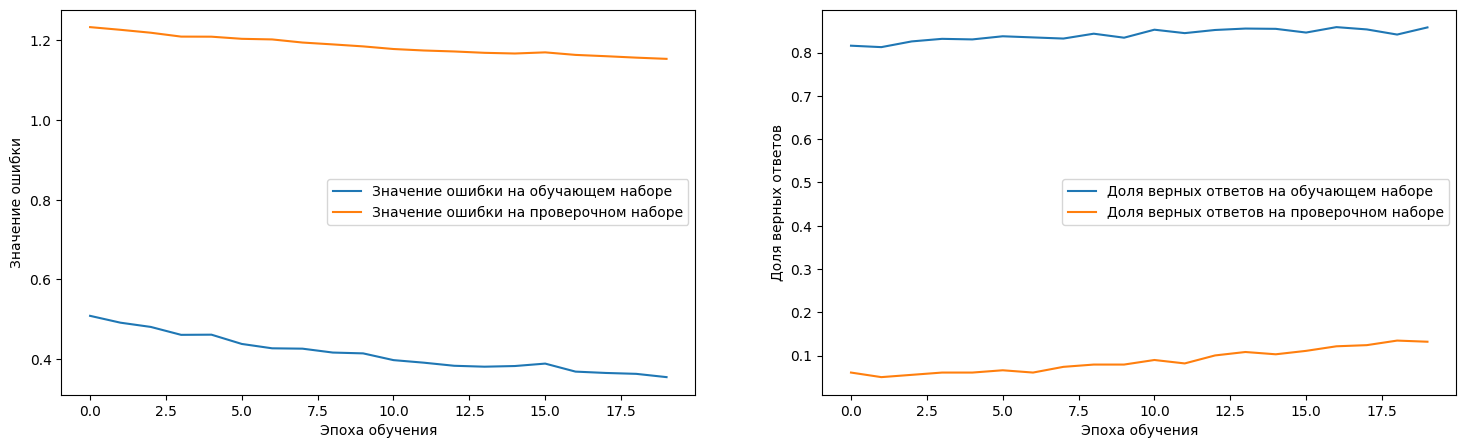

In [ ]:
model_05.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

history = model_05.fit([x_train_harm_05, x_train_Diag_05],
                           y_train_05,
                           shuffle=True,
                           batch_size=16,
                           epochs=20,
                           validation_split=0.2,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

60/60 [==============================] - 1s 15ms/step


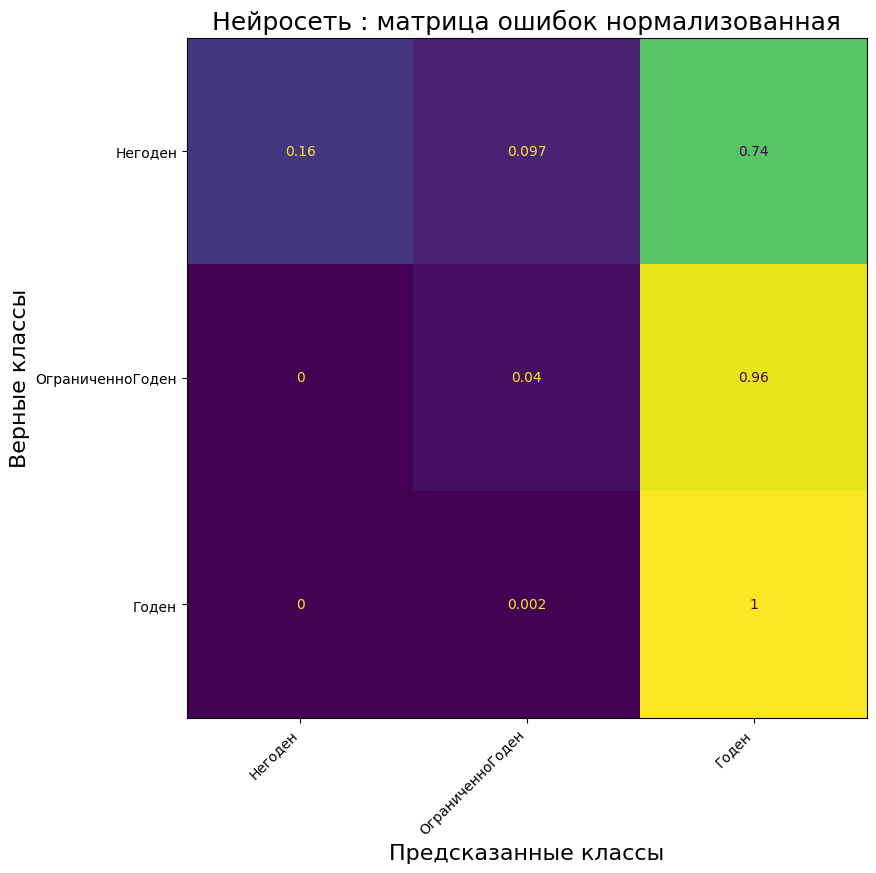

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  40%


In [ ]:
eval_model(model_05, [x_train_harm_05, x_train_Diag_05],
                           y_train_05, class_labels = CLASS_DICT)

# 5. Этап. Эксперимент с расширением датасета классом негоден сприменением генератора

In [ ]:
# Пример предсказания

# обновляем номера индексов
dffix9_cut=dffix9.reset_index(drop=True)

indexes_0 = dffix9_cut.loc[dffix9_cut['ЗаключениеМК'] == 'Негоден'].index.tolist()
indexes_1 = dffix9_cut.loc[dffix9_cut['ЗаключениеМК'] == 'ОграниченноГоден'].index.tolist()
indexes_2 = dffix9_cut.loc[dffix9_cut['ЗаключениеМК'] == 'Годен'].index.tolist()

n_0 = random.choice(indexes_0)
n_1 = random.choice(indexes_1)
n_2 = random.choice(indexes_2)


y_pred = model_05.predict([x_train_harm_05, x_train_Diag_05])

y = np.argmax(y_pred, axis=-1)

df_pred_05 = pd.DataFrame({'Реальное заключение': ['Негоден', 'ОграниченноГоден', 'Годен'],
                   'Реальный вектор': [y_train_05[n_0], y_train_05[n_1], y_train_05[n_2]],
                   'Реальный класс': [y_data_05[n_0], y_data_05[n_1], y_data_05[n_2]],
                   'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                   'Предсказанный класс': [y[n_0], y[n_1], y[n_2]],
                   })
df_pred_05

60/60 [==============================] - 1s 14ms/step


,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Негоден,"[1.0, 0.0, 0.0]",0,"[0.2590084, 0.24835359, 0.49263796]",2
1,ОграниченноГоден,"[0.0, 1.0, 0.0]",1,"[0.06380698, 0.18642597, 0.749767]",2
2,Годен,"[0.0, 0.0, 1.0]",2,"[0.008850441, 0.01236161, 0.978788]",2


Добавление данных из Датасета на основе Приказа 29н и 302н с предобработкой и созданием генератора

In [ ]:
dffix10 = dffix8_cut.reset_index(drop=True)

In [ ]:
df_pr29 = df_add_1.copy()

df_pr29

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Негоден,6.1,Грыжи препятствующие работе и имеющие наклонно...
1,Негоден,6.1,Хронические заболевания периферической нервной...
2,Негоден,6.1,Хроническая ишемия мозга дисциркуляторная энце...
3,Негоден,6.1,Заболевания любой этиологии вызывающие нарушен...
4,Негоден,6.1,Нарушение функции вестибулярного анализатора л...
...,...,...,...
469,Негоден,5.2.1,Нарушение цветоощущения если цвет несет информ...
470,Негоден,5.2.1,Лагофтальм
471,Негоден,5.2.1,Хронические воспалительные и аллергические заб...
472,Негоден,5.2.1,Заболевания зрительного нерва сетчатки


In [ ]:
df_pr29.Свод_Диагноз.value_counts()

Беременность и период лактации                                                                                                                                                                             17
Нарушение функции вестибулярного анализатора любой этиологии                                                                                                                                               16
Выраженные расстройства вегетативной автономной нервной системы                                                                                                                                            14
Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата синдромы головокружения нистагм болезнь Меньера лабиринтиты вестибулярные кризы любой этиологии и др                      12
Хронические рецидивирующие заболевания кожи с частотой обострения 4 раза и более за календарный год                                                                             

In [ ]:
print(df_pr29.Вредность.value_counts())
print(df_pr29['Вредность'].nunique())

18.1      51
5.2.1     21
14        20
19        20
23        19
16        18
27        17
17        17
24        16
18.2      14
11.4      14
11.3      14
11.2      14
11.1      14
5.1       14
4.8       14
4.10      13
8         12
4.1       12
6.1       12
22        10
12         9
4.7        9
26         8
4.2.1      8
10         8
4.3.2      8
25         8
4.3.1      8
13         7
15         6
9          6
4.2.1.     5
4.4        4
4.5        4
7          4
4.2.5      3
4.2.4      3
4.2.2      3
4.9        3
4.6        2
4.2.3      1
5.2.2      1
Name: Вредность, dtype: int64
43


In [ ]:
list_of_harm = df_pr29['Вредность'].unique().tolist()
print (list_of_harm)
promdict = dict.fromkeys(list_of_harm)
# cleardict = dict.fromkeys(list_of_harm)
# print (promdict)

for A in list_of_harm:
  df1 = df_pr29[df_pr29['Вредность']==A]
  list_of_daig = df1['Свод_Диагноз'].unique().tolist()
  promdict[A]=list_of_daig

print (promdict)

['6.1', '8', '7', '9', '10', '11.1', '11.2', '11.3', '11.4', '12', '13', '22', '14', '15', '19', '16', '17', '23', '27', '25', '26', '24', '18.1', '18.2', '4.1', '4.2.1.', '4.2.2', '4.2.3', '4.2.4', '4.2.5', '4.2.1', '4.3.1', '4.3.2', '4.4', '4.5', '4.6', '4.7', '4.8', '4.10', '4.9', '5.1', '5.2.1', '5.2.2']
{'6.1': ['Грыжи препятствующие работе и имеющие наклонность к ущемлению', 'Хронические заболевания периферической нервной системы с обострениями 3 и более раза за календарный год', 'Хроническая ишемия мозга дисциркуляторная энцефалопатия', 'Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата синдромы головокружения нистагм болезнь Меньера лабиринтиты вестибулярные кризы любой этиологии и др', 'Нарушение функции вестибулярного анализатора любой этиологии', 'Стойкое понижение слуха 3 и более месяца любой этиологии одно и двустороннее острота слуха шепотная речь не менее 3 м за исключением отсутствия слуха выраженных и значительно выраженных нарушений слух

In [ ]:
print (promdict['4.6'])

['Нарушения функции вестибулярного аппарата любой этиологии ', 'Выраженные расстройства вегетативной автономной нервной системы']


In [ ]:

# выбираем случайное значение из списка
df_pr29_c1 = df_pr29.copy()

for i in range (40):
  random_harm = random.choice(list_of_harm)
  random_diag = random.choice(promdict[random_harm])
  print(random_harm, ':', random_diag)
  df_pr29_c1.loc[len(df_pr29_c1.index)]=['Негоден',random_harm, random_diag]

df_pr29_c1


4.5 : Выраженные расстройства вегетативной автономной нервной системы
5.2.2 : заболевания с нарушением голосовой функции за исключением узелков полипов и паралича голосовых связок и гортани у работающих
16 : Хронические заболевания слезовыводящих путей век органические недостатки век препятствующие полному их смыканию свободному движению глазного яблока
4.6 : Выраженные расстройства вегетативной автономной нервной системы
7 : Беременность и период лактации
5.1 : Заболевания скелетномышечной системы с частотой обострения 3 раза и более за календарный год
4.4 : легкая степень снижения слуха I степень тугоухости  при наличии отрицательной динамики в течение года по данным исследования порогов слуха при тональной пороговой аудиометрии в расширенном диапазоне частот
4.6 : Нарушения функции вестибулярного аппарата любой этиологии 
17 : Доброкачественные опухоли препятствующие выполнению работ в противогазах
11.2 : Беременность и период лактации
25 : гонорея все формы  только для работников м

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Негоден,6.1,Грыжи препятствующие работе и имеющие наклонно...
1,Негоден,6.1,Хронические заболевания периферической нервной...
2,Негоден,6.1,Хроническая ишемия мозга дисциркуляторная энце...
3,Негоден,6.1,Заболевания любой этиологии вызывающие нарушен...
4,Негоден,6.1,Нарушение функции вестибулярного анализатора л...
...,...,...,...
509,Негоден,4.2.2,Катаракта осложненная
510,Негоден,16,Общее физическое недоразвитие и недоразвитие о...
511,Негоден,8,не поддающиеся лечению дакриоциститы и неизлеч...
512,Негоден,9,Нарушение функции вестибулярного анализатора л...


In [ ]:
def gen_profstop (num_gen, somedict, somelist, somedf):
  additional_df = somedf.copy()
  for i in range (num_gen):
    ran_h = random.choice(somelist)
    ran_d = random.choice(somedict[ran_h])
    additional_df.loc[len(additional_df.index)]=['Негоден', ran_h, ran_d]

  return additional_df

In [ ]:
dffix10

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
1415,Годен,"4.4,4.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."
1416,Годен,4.4,"Общий медицинский осмотр,Общий медицинский осм..."
1417,Годен,3.1.8.2,"Общий медицинский осмотр,Общий медицинский осм..."
1418,Годен,"4.2.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."


In [ ]:
dffix10.Свод_Диагноз.value_counts()

Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                              261
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                     187
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                       147
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                                                 64
Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский о

In [ ]:
print (len(promdict))
print (len(list_of_harm))

43
43


In [ ]:
dffix10.ЗаключениеМК.value_counts()

Годен               1284
ОграниченноГоден     125
Негоден               11
Name: ЗаключениеМК, dtype: int64

In [ ]:
dffix11 = gen_profstop (1100, promdict, list_of_harm, dffix10)

In [ ]:
dffix11

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
2515,Негоден,16,Хронические заболевания периферической нервной...
2516,Негоден,7,Острота зрения с коррекцией ниже 05 на одном г...
2517,Негоден,15,Острота зрения с коррекцией ниже 05 на одном г...
2518,Негоден,5.1,Болезнь и синдром Рейно


In [ ]:
dffix11.Свод_Диагноз.value_counts()

Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                           261
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                  187
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                    147
Выраженные расстройства вегетативной автономной нервной системы                                                                                                                                                                  88
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицин

In [ ]:
dffix11.Вредность.value_counts()

23                                                       198
4.2.5                                                    137
11.1                                                      62
9                                                         56
5.1                                                       54
                                                        ... 
9,6.2                                                      1
1.30.1,1.29.2,1.34.1,1.36.1,1.14.2,1.50,1.37.1,1.29.4      1
1.36.1,4.3.2,4.4,4.7,5.1,6.1,11.1                          1
1.29.2,4.1,4.3.2,11.1,17,18.2,11.4                         1
6,9                                                        1
Name: Вредность, Length: 385, dtype: int64

In [ ]:
# Настройка номеров столбцов

COL_DIAG    = dffix11.columns.get_loc('Свод_Диагноз')
COL_HARM   = dffix11.columns.get_loc('Вредность')
# CLASS_COUNT = dffix15['ЗаключениеМК'].nunique()
CLASS_LIST = dffix11.ЗаключениеМК.value_counts()
print (CLASS_LIST)

Годен               1284
Негоден             1111
ОграниченноГоден     125
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_6 = extract_Diag_text(dffix11.values)

tokenizer_Diag.fit_on_texts(Diag_text_6)
items_Diag = list(tokenizer_Diag.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_6 = tokenizer_Diag.texts_to_sequences(Diag_text_6)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_06 = tokenizer_Diag.sequences_to_matrix(Diag_seq_6)

print(items_Diag[:50])
print("Размер словаря", len(items_Diag))              # Длина словаря

[('unknown', 1), ('Общий медицинский осмотр', 2), ('Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности', 3), ('Миопия', 4), ('Астигматизм', 5), ('Гиперметропия', 6), ('Хронический поверхностный гастрит', 7), ('Выраженные расстройства вегетативной автономной нервной системы', 8), ('Беременность и период лактации', 9), ('Нарушение функции вестибулярного анализатора любой этиологии', 10), ('Амблиопия вследствие анопсии', 11), ('Другие расстройства вегетативной [автономной] нервной системы', 12), ('Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата синдромы головокружения нистагм болезнь Меньера лабиринтиты вестибулярные кризы любой этиологии и др', 13), ('Дегенеративнодистрофические заболевания сетчатки глаз', 14), ('Хронические рецидивирующие заболевания кожи с частотой обострения 4 раза и более за календарный год', 15), ('Хронические заболевания периферической нервной системы с частотой об

In [ ]:
# Проверка получившихся данных
n = 520
print(Diag_text_6[n])                       # Диагноз в тексте
print(Diag_seq_6[n])                        # Диагноз в индексах слов
print(x_train_Diag_06[n][0:200])          # Диагноз в bag of words

['Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности']
[2, 2, 2, 2, 3]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_6 = extract_harm_text(dffix11.values)

tokenizer_harm.fit_on_texts(harm_text_6)
items_harm = list(tokenizer_harm.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_6 = tokenizer_harm.texts_to_sequences(harm_text_6)

# Преобразование последовательностей индексов в bag of words
x_train_harm_06 = tokenizer_harm.sequences_to_matrix(harm_seq_6)

print(items_harm[:50])
print("Размер словаря", len(items_harm))              # Длина словаря

[('unknown', 1), ('6.1', 2), ('4.4', 3), ('5.1', 4), ('4.2.5', 5), ('23', 6), ('18.1', 7), ('11.1', 8), ('9', 9), ('6.2', 10), ('15', 11), ('1.50', 12), ('18.2', 13), ('25', 14), ('6', 15), ('4.7', 16), ('4.1', 17), ('1.30.1', 18), ('4.3.1', 19), ('1.1', 20), ('11.4', 21), ('4.3.2', 22), ('4.8', 23), ('1.14.2', 24), ('1.37.1', 25), ('17', 26), ('1.29.2', 27), ('1.8.1.1', 28), ('1.34.1', 29), ('4.5', 30), ('27', 31), ('3.1.7', 32), ('1.36.1', 33), ('12', 34), ('13', 35), ('4.2.1', 36), ('1.19.1', 37), ('4.6', 38), ('11.3', 39), ('1.3', 40), ('1.29.1', 41), ('8', 42), ('1.8.1.2', 43), ('1.39', 44), ('4.9', 45), ('26', 46), ('3.4', 47), ('1.8.2.1', 48), ('18', 49), ('16', 50)]
Размер словаря 99


In [ ]:
# Проверка получившихся данных
n = 1421
print(harm_text_6[n])                       # Вредность в тексте
print(harm_seq_6[n])                        # Вредность в индексах слов
print(x_train_harm_06[n][0:100])          # Вредность в bag of words

['4.2.2']
[74]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Пример текста о вредности и диагнозе
print(dffix11.values[1421])

['Негоден' '4.2.2'
 'Выраженные расстройства вегетативной автономной нервной системы']


In [ ]:
y_data_06, y_train_06 = Y_to_OHE(dffix11)

In [ ]:
print('Размер выборки вредности', x_train_harm_06.shape)
print('Размер выборки Диагноза', x_train_Diag_06.shape)
print('Размер выборки Заключения', y_train_06.shape)

Размер выборки вредности (2520, 1000)
Размер выборки Диагноза (2520, 1000)
Размер выборки Заключения (2520, 3)


In [ ]:
input1 = Input((x_train_harm_06.shape[1],))
input2 = Input((x_train_Diag_06.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(4000, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(500, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(100, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1000, activation="relu")(x2)
x2 = Dense(4000, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(500, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(100, activation="relu")(x2)

x = concatenate([x1, x2])             # Объединение 2 веток

x = Dense(100, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.2)(x)
x = Dense(10, activation='relu')(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_06 = Model((input1, input2), x)

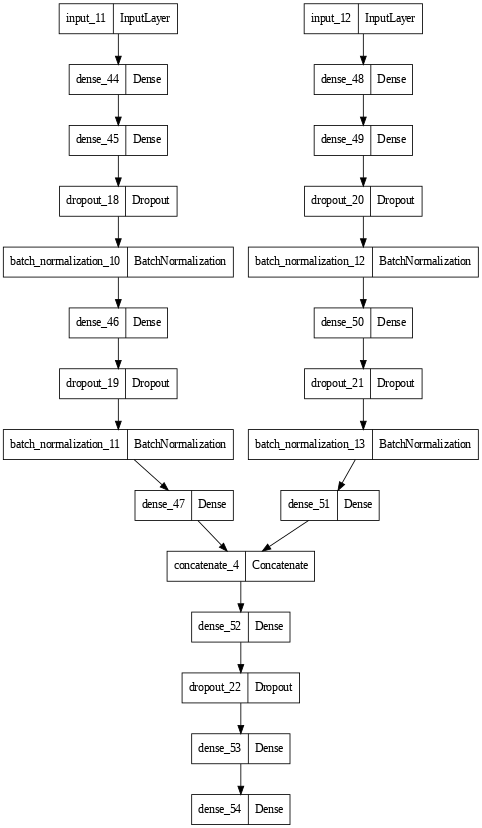

In [ ]:
utils.plot_model(model_06, dpi=60)

In [ ]:
model_06.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 1000)]       0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1000)]       0           []                               
                                                                                                  
 dense_44 (Dense)               (None, 1000)         1001000     ['input_11[0][0]']               
                                                                                                  
 dense_48 (Dense)               (None, 1000)         1001000     ['input_12[0][0]']               
                                                                                            

Epoch 1/30
126/126 [==============================] - 55s 393ms/step - loss: 1.7642 - accuracy: 0.0719 - val_loss: 1.1103 - val_accuracy: 0.0000e+00
Epoch 2/30
126/126 [==============================] - 44s 346ms/step - loss: 1.5179 - accuracy: 0.0883 - val_loss: 1.1185 - val_accuracy: 0.0000e+00
Epoch 3/30
126/126 [==============================] - 30s 236ms/step - loss: 1.3613 - accuracy: 0.1047 - val_loss: 1.0996 - val_accuracy: 0.0079
Epoch 4/30
126/126 [==============================] - 29s 233ms/step - loss: 1.2676 - accuracy: 0.1220 - val_loss: 1.0483 - val_accuracy: 0.0694
Epoch 5/30
126/126 [==============================] - 30s 242ms/step - loss: 1.1899 - accuracy: 0.1458 - val_loss: 0.9376 - val_accuracy: 0.2817
Epoch 6/30
126/126 [==============================] - 28s 225ms/step - loss: 1.1298 - accuracy: 0.1791 - val_loss: 0.8084 - val_accuracy: 0.4544
Epoch 7/30
126/126 [==============================] - 33s 260ms/step - loss: 1.0767 - accuracy: 0.1939 - val_loss: 0.7239 

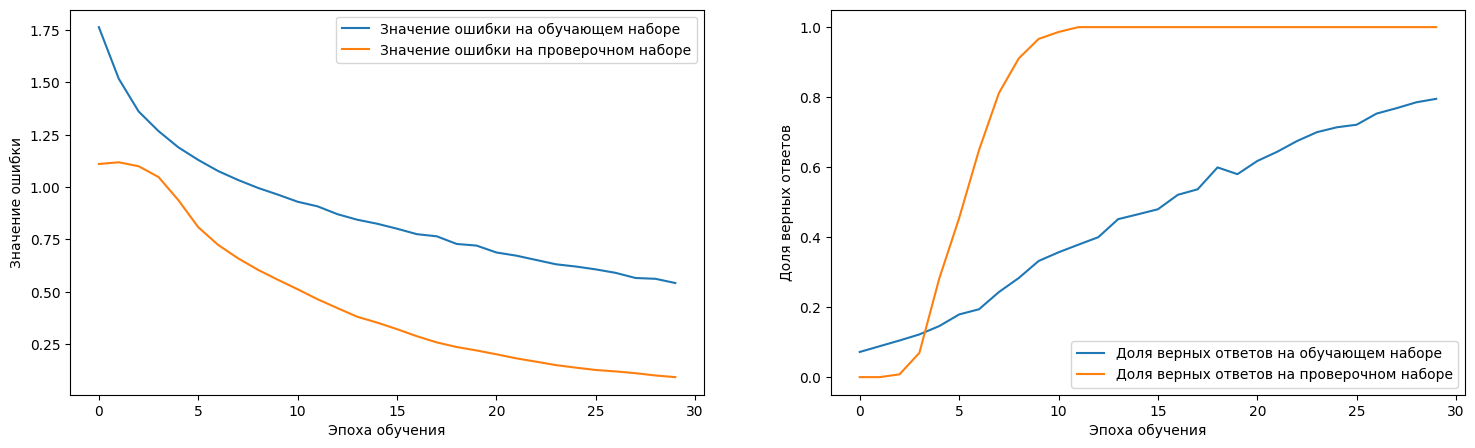

In [ ]:
model_06.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

history = model_06.fit([x_train_harm_06, x_train_Diag_06],
                           y_train_06,
                           shuffle=True,
                           batch_size=16,
                           epochs=30,
                           validation_split=0.2,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

79/79 [==============================] - 3s 32ms/step


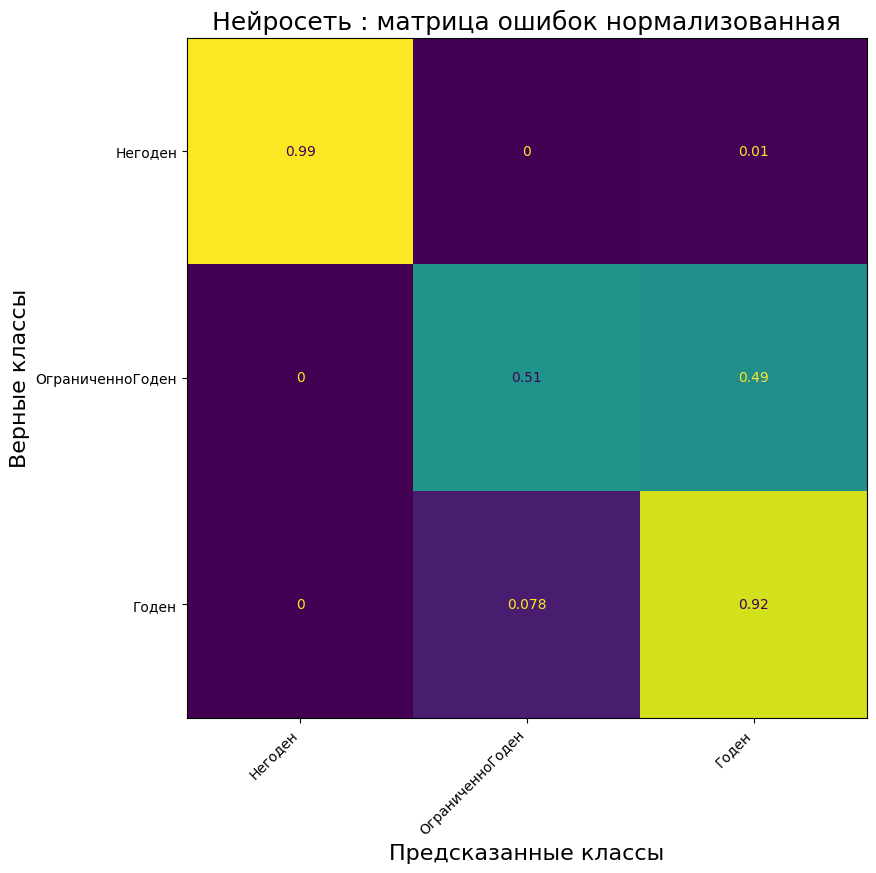

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  81%


In [ ]:
eval_model(model_06, [x_train_harm_06, x_train_Diag_06],
                           y_train_06, class_labels = CLASS_DICT)

In [ ]:
# Пример предсказания

# обновляем номера индексов
dffix11_cut=dffix11.reset_index(drop=True)

indexes_0 = dffix11_cut.loc[dffix11_cut['ЗаключениеМК'] == 'Негоден'].index.tolist()
indexes_1 = dffix11_cut.loc[dffix11_cut['ЗаключениеМК'] == 'ОграниченноГоден'].index.tolist()
indexes_2 = dffix11_cut.loc[dffix11_cut['ЗаключениеМК'] == 'Годен'].index.tolist()

n_0 = random.choice(indexes_0)
n_1 = random.choice(indexes_1)
n_2 = random.choice(indexes_2)


y_pred = model_06.predict([x_train_harm_06, x_train_Diag_06])

y = np.argmax(y_pred, axis=-1)

df_pred_06 = pd.DataFrame({'Реальное заключение': ['Негоден', 'ОграниченноГоден', 'Годен'],
                   'Реальный вектор': [y_train_06[n_0], y_train_06[n_1], y_train_06[n_2]],
                   'Реальный класс': [y_data_06[n_0], y_data_06[n_1], y_data_06[n_2]],
                   'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                   'Предсказанный класс': [y[n_0], y[n_1], y[n_2]],
                   })
df_pred_06

79/79 [==============================] - 5s 58ms/step


,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Негоден,"[1.0, 0.0, 0.0]",0,"[0.93041295, 0.06948303, 0.0001040327]",0
1,ОграниченноГоден,"[0.0, 1.0, 0.0]",1,"[0.04148586, 0.4471298, 0.51138437]",2
2,Годен,"[0.0, 0.0, 1.0]",2,"[0.10018453, 0.3147942, 0.5850214]",2


# 6. Этап.Эксперимент с дополнением генератором класса ОграниченноГоден

In [ ]:
dffix12 = dffix11_cut.copy()

In [ ]:
df_limited = dffix12[dffix12['ЗаключениеМК'].isin(['ОграниченноГоден'])]
df_limited

,ЗаключениеМК,Вредность,Свод_Диагноз
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
6,ОграниченноГоден,11.1,"Миопия,Общий медицинский осмотр,Общий медицинс..."
10,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
19,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
1362,ОграниченноГоден,"23,15,4.4,5.1","Общий медицинский осмотр,Миопия,Общий медицинс..."
1363,ОграниченноГоден,"4.4,5.1,6.1,15","Общий медицинский осмотр,Астигматизм,Общий мед..."
1378,ОграниченноГоден,"4.2.5,6,14,11.3,11.4","Общий медицинский осмотр,Миопия,Общий медицинс..."
1401,ОграниченноГоден,"4.4,6.1","Общий медицинский осмотр,Астигматизм,Пресбиаку..."


In [ ]:
df_limcut=df_limited.reset_index(drop=True)
df_limcut

,ЗаключениеМК,Вредность,Свод_Диагноз
0,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
1,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
2,ОграниченноГоден,11.1,"Миопия,Общий медицинский осмотр,Общий медицинс..."
3,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
120,ОграниченноГоден,"23,15,4.4,5.1","Общий медицинский осмотр,Миопия,Общий медицинс..."
121,ОграниченноГоден,"4.4,5.1,6.1,15","Общий медицинский осмотр,Астигматизм,Общий мед..."
122,ОграниченноГоден,"4.2.5,6,14,11.3,11.4","Общий медицинский осмотр,Миопия,Общий медицинс..."
123,ОграниченноГоден,"4.4,6.1","Общий медицинский осмотр,Астигматизм,Пресбиаку..."


In [ ]:
print(df_limcut.Вредность.value_counts())
print(df_limcut['Вредность'].nunique())

4.2.5                 14
11.1                   7
9                      6
15                     5
5.1                    4
                      ..
1.50,3.1.8.2           1
1.49,5.1               1
1.30.1,4.4,6.1,6.2     1
5.1,6.1,6.2            1
6.1,6.2,4.4,9          1
Name: Вредность, Length: 76, dtype: int64
76


In [ ]:
list_of_harm = df_limcut['Вредность'].unique().tolist()
print (list_of_harm)
promdict = dict.fromkeys(list_of_harm)
print (promdict)
print (len(promdict))

for A in list_of_harm:
  df1 = df_limcut[df_limcut['Вредность']==A]
  list_of_diag = df1['Свод_Диагноз'].unique().tolist()
  promdict[A]=list_of_diag

print (promdict)

['4.2.5', '11.1', '5.1,6.1,6.2', '5.1', '6.1,6.2', '1.34.1,1.19.1,1.14.2,1.50,1.37.1,1.8.1.1,1.8.2.1', '1.50,1.34.1,1.37.1', '1.34.1,1.37.1,1.50', '1.8.1.1,1.50', '1.1,1.8.1.1,1.8.1.2,1.14.2,1.18.3,1.19.1,1.29.1,1.29.2,1.30.1,1.36.1,1.37.1.1,1.34.1,1.50', '1.1,1.8.1.1,1.8.1.2,1.14.2,1.18.3,1.19.1,1.29.1,1.29.2,1.30.1,1.36.1,1.37.1,1.34.1,1.50', '1.14.2,1.29.2,1.29.4,1.30.1,1.34.1,1.36.1,1.37.1,1.50', '1.1,1.8.1.1,1.8.1.2,1.14.2,1.18.3,1.19.1,1.29.1,1.29.2,1.30.1,1.34.1,1.36.1,1.50,1.37.1', '1.14.1,1.50', '1.14.2,1.29.2,1.29.4,1.30.1,1.34.1,1.36.1,1.37.1', '6.1,9,15', '11.1,4.2.5', '1.29.2,4.2.5,4.4,4.7,4.1,11.1,6.2', '15', '4.4,5.1,6.1,15', '1.29.2,4.1,4.3.2,11.1,17,18.2,11.4', '4.2.5,11.1,11.4', '4.2.3,4.5', '6.2,1.14.2,1.37.1.1,1.3', '1.29.2,1.29.4,1.30.1,1.34.1,1.36.1,1.37.1,1.50,1.14.2', '4.4,5.1,15', '4.1,4.1', '4.1,4.7,4.8,5.1,4.1,4.7,4.8,5.1', '1.1,1.8.1.1,1.36.1', '1.1,1.8.1.1', '1.1,1.8.1.1,1.34.1', '1.50,3.1.2,4.3.1,15', '1.14.2,1.29.1,1.37.1,1.50', '4.4,15', '1.50,3.1.8.2', 

In [ ]:
advanceddict = {}

for key in promdict:
    # проверяем, есть ли в ключе разделитель ","
    if re.search(',', key):
        # если есть, то разделяем ключ на список из отдельных ключей
        subkeys = key.split(',')
        # для каждого нового ключа создаем запись в новом словаре
        for subkey in subkeys:
            # копируем значение из старого словаря
            advanceddict[subkey] = promdict[key]
    else:
        # если разделителя нет, то просто копируем ключ и значение
        advanceddict[key] = promdict[key]

print(advanceddict)

{'4.2.5': ['Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр'], '11.1': ['Общий медицинский осмотр,Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Язва двенадцатиперстной кишки хроническая без кровотечения или прободения,Общий медицинский осмотр'], '5.1': ['Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Варикозное расширение вен нижних конечностей без язвы или воспаления'], '6.1': ['Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Цереброваскулярная болезнь неуточненная,Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности,Общий медицинский осмотр'], '6.2': ['Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Цереброваскулярная болезнь неуточненная,Гипертензив

In [ ]:
print (advanceddict['6.1'])
print (len(advanceddict))

['Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Цереброваскулярная болезнь неуточненная,Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности,Общий медицинский осмотр']
54


In [ ]:
list_adv_harm = []
for key in advanceddict:
  list_adv_harm.append(key)
print (list_adv_harm)

['4.2.5', '11.1', '5.1', '6.1', '6.2', '1.34.1', '1.19.1', '1.14.2', '1.50', '1.37.1', '1.8.1.1', '1.8.2.1', '1.1', '1.8.1.2', '1.18.3', '1.29.1', '1.29.2', '1.30.1', '1.36.1', '1.37.1.1', '1.29.4', '1.14.1', '9', '15', '4.4', '4.7', '4.1', '4.3.2', '17', '18.2', '11.4', '4.2.3', '4.5', '1.3', '4.8', '3.1.2', '4.3.1', '3.1.8.2', '1.49', '3.1.8.3', '18.1', '3.1.8.1', '3.4', '4.9', '1.39', '23', '12', '13', '6', '27', '8', '18', '14', '11.3']


In [ ]:

# выбираем случайное значение из списка
df_limexp = df_limcut.copy()

for i in range (40):
  random_harm = random.choice(list_adv_harm)
  random_diag = random.choice(advanceddict[random_harm])
  print(random_harm, ':', random_diag)
  df_limexp.loc[len(df_limexp.index)]=['ОграниченноГоден',random_harm, random_diag]

df_limexp


18 : Общий медицинский осмотр,Гиперметропия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр
1.29.1 : Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр
1.49 : Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр
1.14.1 : Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Лейомиома матки,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр
1.49 : Общий медицинский осмотр,Миопия,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр
4.1 : Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр
3.1.8.2 : Общий медицинский осмотр,Астигматизм,Общий медицинский осмотр,Об

,ЗаключениеМК,Вредность,Свод_Диагноз
0,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
1,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
2,ОграниченноГоден,11.1,"Миопия,Общий медицинский осмотр,Общий медицинс..."
3,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
160,ОграниченноГоден,3.1.8.2,"Общий медицинский осмотр,Астигматизм,Общий мед..."
161,ОграниченноГоден,13,"Общий медицинский осмотр,Общий медицинский осм..."
162,ОграниченноГоден,23,"Общий медицинский осмотр,Миопия,Общий медицинс..."
163,ОграниченноГоден,15,"Общий медицинский осмотр,Миопия,Общий медицинс..."


In [ ]:
def gen_proflimited (num_gen, somedict, somelist, somedf):
  additional_df = somedf.copy()
  for i in range (num_gen):
    ran_h = random.choice(somelist)
    ran_d = random.choice(somedict[ran_h])
    additional_df.loc[len(additional_df.index)]=['ОграниченноГоден', ran_h, ran_d]

  return additional_df

In [ ]:
dffix12

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
2515,Негоден,16,Хронические заболевания периферической нервной...
2516,Негоден,7,Острота зрения с коррекцией ниже 05 на одном г...
2517,Негоден,15,Острота зрения с коррекцией ниже 05 на одном г...
2518,Негоден,5.1,Болезнь и синдром Рейно


In [ ]:
dffix12.Свод_Диагноз.value_counts()

Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                           261
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                  187
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр                                                                                                    147
Выраженные расстройства вегетативной автономной нервной системы                                                                                                                                                                  88
Общий медицинский осмотр,Общий медицинский осмотр,Общий медицинский осмотр,Общий медицин

In [ ]:
dffix12.ЗаключениеМК.value_counts()

Годен               1284
Негоден             1111
ОграниченноГоден     125
Name: ЗаключениеМК, dtype: int64

In [ ]:
dffix13 = gen_proflimited (1000, advanceddict, list_adv_harm, dffix12)

In [ ]:
dffix13

,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3,Годен,11.1,"Общий медицинский осмотр,Общий медицинский осм..."
4,ОграниченноГоден,11.1,"Астигматизм,Общий медицинский осмотр,Общий мед..."
...,...,...,...
3515,ОграниченноГоден,8,"Общий медицинский осмотр,Гиперметропия,Общий м..."
3516,ОграниченноГоден,13,"Общий медицинский осмотр,Общий медицинский осм..."
3517,ОграниченноГоден,11.4,"Общий медицинский осмотр,Миопия,Общий медицинс..."
3518,ОграниченноГоден,1.14.1,"Общий медицинский осмотр,Миопия,Общий медицинс..."


In [ ]:
dffix13.Вредность.value_counts()

23                                                             217
4.2.5                                                          155
11.1                                                            79
18.1                                                            78
5.1                                                             75
                                                              ... 
1.1,1.8.1.1,1.8.1.2,1.8.2.2,1.8.3.1,1.8.3.2,4.2.5,18.1,18.2      1
1.29.1,5.1,6.1,9,11.1,15                                         1
3.4,4.2.5                                                        1
1.29.2,4.1,4.3.2,5.1,11.1,11.3,18.2                              1
4.3.1,6.1,9                                                      1
Name: Вредность, Length: 408, dtype: int64

In [ ]:
# Настройка номеров столбцов

COL_DIAG    = dffix13.columns.get_loc('Свод_Диагноз')
COL_HARM   = dffix13.columns.get_loc('Вредность')
# CLASS_COUNT = dffix15['ЗаключениеМК'].nunique()
CLASS_LIST = dffix13.ЗаключениеМК.value_counts()
print (CLASS_LIST)

Годен               1284
ОграниченноГоден    1125
Негоден             1111
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_7 = extract_Diag_text(dffix13.values)

tokenizer_Diag.fit_on_texts(Diag_text_7)
items_Diag = list(tokenizer_Diag.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_7 = tokenizer_Diag.texts_to_sequences(Diag_text_7)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_07 = tokenizer_Diag.sequences_to_matrix(Diag_seq_7)

print(items_Diag[:50])
print("Размер словаря", len(items_Diag))              # Длина словаря

[('unknown', 1), ('Общий медицинский осмотр', 2), ('Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности', 3), ('Миопия', 4), ('Астигматизм', 5), ('Гиперметропия', 6), ('Хронический поверхностный гастрит', 7), ('Выраженные расстройства вегетативной автономной нервной системы', 8), ('Нарушение функции вестибулярного анализатора любой этиологии', 9), ('Беременность и период лактации', 10), ('Дегенеративнодистрофические заболевания сетчатки глаз', 11), ('Начальная старческая катаракта', 12), ('Катаракта осложненная', 13), ('Хронические рецидивирующие заболевания кожи с частотой обострения 4 раза и более за календарный год', 14), ('Заболевания любой этиологии вызывающие нарушение функции вестибулярного аппарата синдромы головокружения нистагм болезнь Меньера лабиринтиты вестибулярные кризы любой этиологии и др', 15), ('Хронические заболевания периферической нервной системы с частотой обострения 3 раза и более за календарный

In [ ]:
# Проверка получившихся данных
n = 520
print(Diag_text_7[n])                       # Диагноз в тексте
print(Diag_seq_7[n])                        # Диагноз в индексах слов
print(x_train_Diag_07[n][0:200])          # Диагноз в bag of words

['Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности']
[2, 2, 2, 2, 3]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_7 = extract_harm_text(dffix13.values)

tokenizer_harm.fit_on_texts(harm_text_7)
items_harm = list(tokenizer_harm.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_7 = tokenizer_harm.texts_to_sequences(harm_text_7)

# Преобразование последовательностей индексов в bag of words
x_train_harm_07 = tokenizer_harm.sequences_to_matrix(harm_seq_7)

print(items_harm[:50])
print("Размер словаря", len(items_harm))              # Длина словаря

[('unknown', 1), ('6.1', 2), ('4.4', 3), ('5.1', 4), ('4.2.5', 5), ('23', 6), ('18.1', 7), ('11.1', 8), ('9', 9), ('6.2', 10), ('15', 11), ('1.50', 12), ('18.2', 13), ('4.7', 14), ('4.1', 15), ('6', 16), ('25', 17), ('4.3.1', 18), ('1.30.1', 19), ('1.1', 20), ('4.3.2', 21), ('11.4', 22), ('4.8', 23), ('1.14.2', 24), ('17', 25), ('1.37.1', 26), ('1.29.2', 27), ('4.5', 28), ('1.8.1.1', 29), ('1.34.1', 30), ('27', 31), ('12', 32), ('3.1.7', 33), ('1.36.1', 34), ('13', 35), ('11.3', 36), ('4.2.1', 37), ('8', 38), ('4.6', 39), ('4.9', 40), ('1.19.1', 41), ('1.3', 42), ('1.29.1', 43), ('1.39', 44), ('1.8.1.2', 45), ('26', 46), ('4.2.3', 47), ('14', 48), ('3.4', 49), ('16', 50)]
Размер словаря 99


In [ ]:
# Проверка получившихся данных
n = 1421
print(harm_text_7[n])                       # Вредность в тексте
print(harm_seq_7[n])                        # Вредность в индексах слов
print(x_train_harm_07[n][0:100])          # Вредность в bag of words

['4.2.2']
[70]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Пример текста о вредности и диагнозе
print(dffix13.values[1421])

['Негоден' '4.2.2'
 'Выраженные расстройства вегетативной автономной нервной системы']


In [ ]:
y_data_07, y_train_07 = Y_to_OHE(dffix13)

In [ ]:
print('Размер выборки вредности', x_train_harm_07.shape)
print('Размер выборки Диагноза', x_train_Diag_07.shape)
print('Размер выборки Заключения', y_train_07.shape)

Размер выборки вредности (3520, 1000)
Размер выборки Диагноза (3520, 1000)
Размер выборки Заключения (3520, 3)


In [ ]:
input1 = Input((x_train_harm_07.shape[1],))
input2 = Input((x_train_Diag_07.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(4000, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(500, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(100, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1000, activation="relu")(x2)
x2 = Dense(4000, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(500, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(100, activation="relu")(x2)

x = concatenate([x1, x2])             # Объединение 2 веток

x = Dense(100, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.2)(x)
x = Dense(10, activation='relu')(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_07 = Model((input1, input2), x)

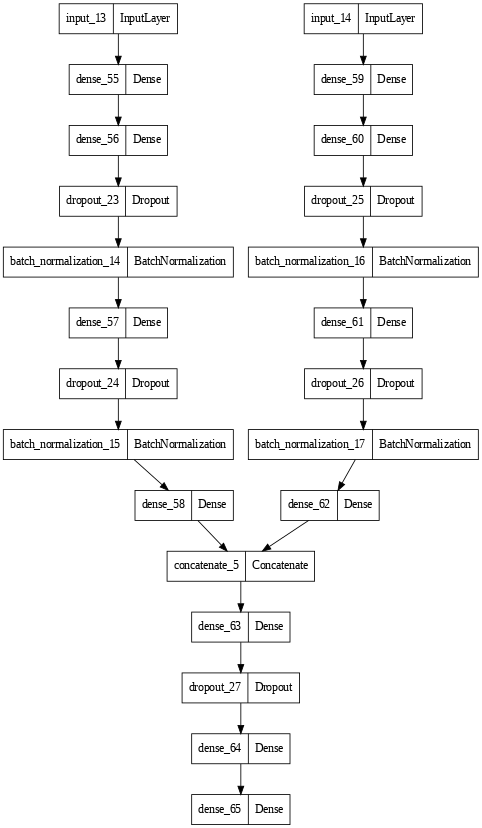

In [ ]:
utils.plot_model(model_07, dpi=60)

In [ ]:
model_07.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 1000)]       0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 1000)]       0           []                               
                                                                                                  
 dense_55 (Dense)               (None, 1000)         1001000     ['input_13[0][0]']               
                                                                                                  
 dense_59 (Dense)               (None, 1000)         1001000     ['input_14[0][0]']               
                                                                                            

Epoch 1/30
176/176 [==============================] - 78s 424ms/step - loss: 0.9131 - accuracy: 0.6037 - val_loss: 1.0404 - val_accuracy: 0.1847
Epoch 2/30
176/176 [==============================] - 59s 333ms/step - loss: 0.6710 - accuracy: 0.7635 - val_loss: 1.0153 - val_accuracy: 0.2358
Epoch 3/30
176/176 [==============================] - 45s 255ms/step - loss: 0.5385 - accuracy: 0.8281 - val_loss: 1.0417 - val_accuracy: 0.3295
Epoch 4/30
176/176 [==============================] - 47s 269ms/step - loss: 0.4694 - accuracy: 0.8558 - val_loss: 0.9709 - val_accuracy: 0.6023
Epoch 5/30
176/176 [==============================] - 45s 255ms/step - loss: 0.4166 - accuracy: 0.8722 - val_loss: 0.8561 - val_accuracy: 0.6222
Epoch 6/30
176/176 [==============================] - 58s 329ms/step - loss: 0.3786 - accuracy: 0.8810 - val_loss: 0.7521 - val_accuracy: 0.7585
Epoch 7/30
176/176 [==============================] - 47s 270ms/step - loss: 0.3489 - accuracy: 0.8942 - val_loss: 0.6660 - val_ac

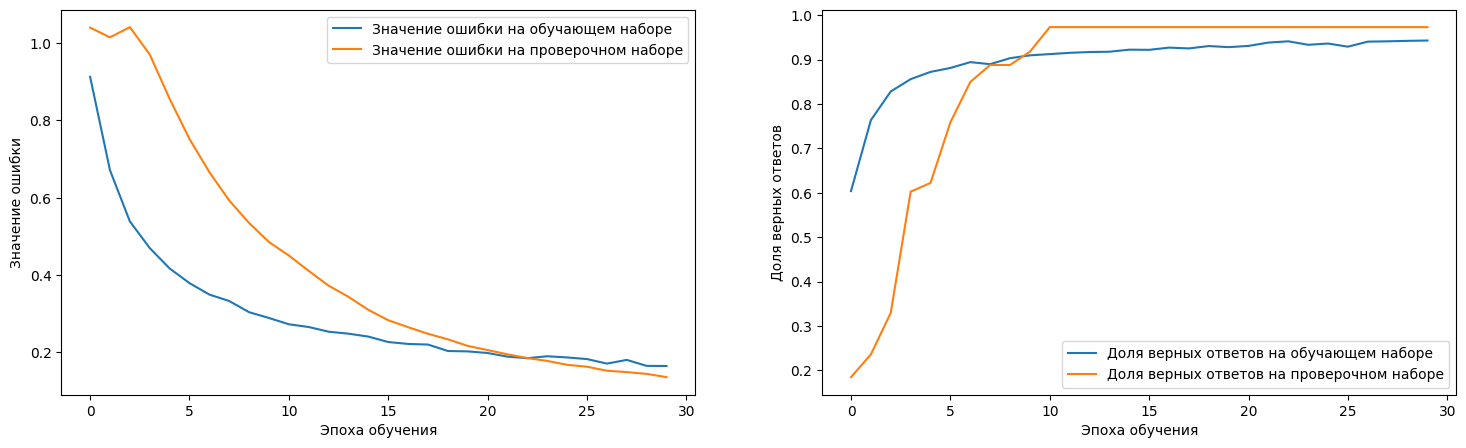

In [ ]:
model_07.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

history = model_07.fit([x_train_harm_07, x_train_Diag_07],
                           y_train_07,
                           shuffle=True,
                           batch_size=16,
                           epochs=30,
                           validation_split=0.2,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

110/110 [==============================] - 4s 33ms/step


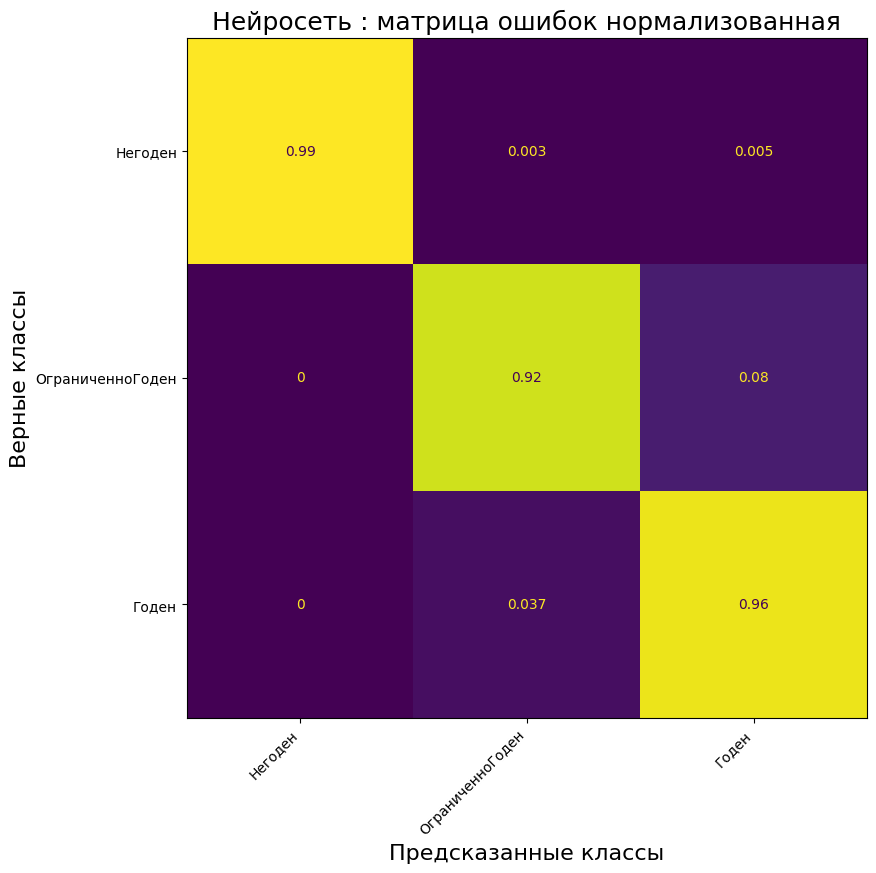

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  96%


In [ ]:
eval_model(model_07, [x_train_harm_07, x_train_Diag_07],
                           y_train_07, class_labels = CLASS_DICT)

In [ ]:
# Пример предсказания

# обновляем номера индексов
dffix13_cut=dffix13.reset_index(drop=True)

indexes_0 = dffix13_cut.loc[dffix13_cut['ЗаключениеМК'] == 'Негоден'].index.tolist()
indexes_1 = dffix13_cut.loc[dffix13_cut['ЗаключениеМК'] == 'ОграниченноГоден'].index.tolist()
indexes_2 = dffix13_cut.loc[dffix13_cut['ЗаключениеМК'] == 'Годен'].index.tolist()

n_0 = random.choice(indexes_0)
n_1 = random.choice(indexes_1)
n_2 = random.choice(indexes_2)


y_pred = model_07.predict([x_train_harm_07, x_train_Diag_07])

y = np.argmax(y_pred, axis=-1)

df_pred_07 = pd.DataFrame({'Реальное заключение': ['Негоден', 'ОграниченноГоден', 'Годен'],
                   'Реальный вектор': [y_train_07[n_0], y_train_07[n_1], y_train_07[n_2]],
                   'Реальный класс': [y_data_07[n_0], y_data_07[n_1], y_data_07[n_2]],
                   'Предсказанный вектор': [y_pred[n_0], y_pred[n_1], y_pred[n_2]],
                   'Предсказанный класс': [y[n_0], y[n_1], y[n_2]],
                   })
df_pred_07

110/110 [==============================] - 8s 67ms/step


,Реальное заключение,Реальный вектор,Реальный класс,Предсказанный вектор,Предсказанный класс
0,Негоден,"[1.0, 0.0, 0.0]",0,"[0.99012387, 0.00518378, 0.004692441]",0
1,ОграниченноГоден,"[0.0, 1.0, 0.0]",1,"[0.017372107, 0.86118096, 0.12144691]",1
2,Годен,"[0.0, 0.0, 1.0]",2,"[0.00035372248, 0.003060508, 0.99658567]",2


In [ ]:
dffix13_cut.to_excel('ppfinal.xlsx', index=False)

**Промежуточный вывод**
Как видно, искусственное расширение датасета классами ОграниченноГоден и Негоден, устранение разбалансировки классов, дает хороший результат точности при обучении модели (более 96%). Для удобства, дальнейшее усовершенствование данной гипотезы, отработка тестовых примеров сведена в отдельный ноутбук: Int_1. Профпатолог_2.00

# 7. Этап. **Отработка эксперимента с autokeras**

In [ ]:
# Загрузка базы данных заказчика, предварительно сохарненной в формате *.csv
df = pd.read_csv('/content/drive/MyDrive/internsheep1/profpat_1.csv')


<ipython-input-49-7b983cea7a77>:2: DtypeWarning: Columns (24,25,26,43,44,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,77,78,79,81,84,85,86,87,88,89,90,91,92,108,109,112,113,120,121,122,123,124,125,126,127,162,163,164,168,169,170,171,172,173,174,195,196,201,202,203,204,205,206,207,208,221,222,223,228,229,230,252,253,258,259,260,261,262,263,264,265,266,267,270,271,272,273,276,277,278,279,282,283,284,285,286,287,293,294,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,363,364,365,366,367,370,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,418,419,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,470,471,472,483,484,485,486,491,492,514,515,549,550,551,552,553,554,555,564,565,578,579,580,581,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,

In [ ]:
CLASS_COUNT = 3

# Задаем словарь классов
CLASS_DICT ={'Негоден':0, 'ОграниченноГоден':1, 'Годен':2}

# Задаем словарь групп здоровья
GZ_DICT ={'':0, 'I':1, 'II':2, 'IIIа':3, 'IIIб':4}

# Создаем метрику для разбалансированных классов
custom_metric = tfa.metrics.F1Score(num_classes=CLASS_COUNT, average="weighted", threshold=0.5, name='F1Score' )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Вспомогательные функции для очистки строковых данных для приведения к удобномы для обратки виду
def purify(x):
    if isinstance(x, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        x1 = re.sub(r',\s*(?=,|$)', '', x).strip(',')
    return x1

def clean_string(text):
    # удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def clean_dict(dict_d):
  advanceddict = {}
  for key in dict_d:
    # проверяем, есть ли в ключе разделитель ","
    if re.search(',', key):
      # если есть, то разделяем ключ на список из отдельных ключей
      subkeys = key.split(',')
      # для каждого нового ключа создаем запись в новом словаре
      for subkey in subkeys:
        # копируем значение из старого словаря
        advanceddict[subkey] = dict_d[key]
    else:
      # если разделителя нет, то просто копируем ключ и значение
      advanceddict[key] = dict_d[key]

  return advanceddict

def format_vector(vector):
    return [round(num, 1) for num in vector]

In [ ]:
# Функция обработки столбца сводного диагноза
def diag_adv (df0):

  df1 = df0.copy()
  # Получим список всех сводных диагнозов
  list_of_Diag = df1['Свод_Диагноз'].tolist()
  # Используя заготовленную функцию, очистим каждую строку от "мусора"
  clearlistdiag=[]
  for A in list_of_Diag:
    clearlistdiag.append(purify(A))
  # Поместим в новую колонку очищенные строки из полученного списка
  df1['Диагнозы'] = True
  df1['Диагнозы'] = clearlistdiag

  # Получаем новую таблицу данных
  df1=df1[['ЗаключениеМК',
           'ГруппаЗдоровья',
           'Вредность',
           'Диагнозы',
           'Рекомендации']]
  return df1

  # Функция обработки столбца рекомендаций
def recom_adv (df1):
    df2 = df1.copy()
    # Получим список всех рекомендаций
    list_of_recom = df2['Рекомендации'].tolist()
    # Используя заготовленную функцию, очистим каждую строку от "мусора"
    clearlistrecom=[]
    for A in list_of_recom:
      clearlistrecom.append(purify(A))
    # Поместим в новую колонку очищенные строки из полученного списка
    df2['Рекомендации'] = True
    df2['Рекомендации'] = clearlistrecom

    # Получаем новую таблицу данных
    df2=df2[['ЗаключениеМК',
              'ГруппаЗдоровья',
              'Вредность',
              'Диагнозы',
              'Рекомендации']]
    return df2

In [ ]:
# Функция извлечения данных:
# - о вредных факторах

def extract_harm_text(df_harm):
    result = []
    COL_HARM   = df_harm.columns.get_loc('Вредность')
    # Для всех строк таблицы: собрать значения столбцов вредности
    for row in df_harm.values:
                    result.append(str(row[COL_HARM]).split(','))
    # Возврат в виде массива
    return result

# - о Диагнозе

def extract_Diag_text(df_diag):
    result = []
    COL_DIAG    = df_diag.columns.get_loc('Диагнозы')
    # Для всех строк таблицы: собрать значения сводного Диагноза
    for row in df_diag.values:
                    result.append(str(row[COL_DIAG]).split(','))
    # Возврат в виде массива
    return result

# - о Рекомендациях

def extract_recom_text(df_diag):
    result = []
    COL_RECOM    = df_diag.columns.get_loc('Рекомендации')
    # Для всех строк таблицы: собрать значения сводного Диагноза
    for row in df_diag.values:
                    result.append(str(row[COL_RECOM]).split(','))
    # Возврат в виде массива
    return result

# - о Группе здоровья OHE

def extract_gz(df):
  GZ_COUNT = 5
  gz_list_key = list(df.ГруппаЗдоровья.values)
  gz_list = []
  for GZ in gz_list_key:
    gz_list.append(GZ_DICT[GZ])

  gz_data = np.array(gz_list)            # Перевод общего списка меток класса в numpy-массив
  gz_res = utils.to_categorical(gz_data, GZ_COUNT)
  return gz_res



# - о  классах в OHE
def Y_to_OHE(df):
  y_list_key = list(df.ЗаключениеМК.values)
  # print (y_list_key)
  y_list = []
  for CD in y_list_key:
    y_list.append(CLASS_DICT[CD])
  # print (y_list)

  y_data = np.array(y_list)            # Перевод общего списка меток класса в numpy-массив

  y_res = utils.to_categorical(y_data, CLASS_COUNT)
  return y_data, y_res

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря

# Частотный словарь вредности
tokenizer_harm = Tokenizer(num_words=256, # объем словаря
                      filters='!"#$%&()*+,-–—/:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Частотный словарь диагнозов узких специалистов
tokenizer_Diag = Tokenizer(num_words=512, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=False, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Частотный словарь рекомендаций узких специалистов
tokenizer_recom = Tokenizer(num_words=128, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=False, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Функция предсказания и визуализация результата
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        # print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
        #                                                                        100. * cm[cls, cls_pred],
        #                                                                        class_labels[cls_pred],
        #                                                                        msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
# Сформируем отдельную функцию, которая по передаваемой исходной таблицы создает сжатую
def getclin(df_in):
  # Получаем на вход некую таблицу данных вида аналогичного первоначально предоставленной
  # Подготовка таблицы данных
  # Убираем полностью пустые строки
  df_in = df_in.dropna(axis=1, how='all')

  # Убираем строки в которых отстутствует одно из встреченных заключений Профпатолога (ПП)
  df_in = df_in[df_in['ЗаключениеМК'].isin(['Годен',
                                      'ГоденСКоррекциейЗрения',
                                      'ВременноНегоден',
                                      'НуждаетсяВДообследованииИЛечении',
                                      'ОграниченноГоден',
                                      'ГоденБезРаботНаВысотах'])]

  # Приводим к 3-м классам (Годен, Негоден, ОграниченноГоден)
  df_in.loc[df_in['ЗаключениеМК'] == 'ВременноНегоден', 'ЗаключениеМК'] = 'Негоден'
  df_in.loc[df_in['ЗаключениеМК'] == 'НуждаетсяВДообследованииИЛечении', 'ЗаключениеМК'] = 'Негоден'
  df_in.loc[df_in['ЗаключениеМК'] == 'ГоденСКоррекциейЗрения', 'ЗаключениеМК'] = 'ОграниченноГоден'
  df_in.loc[df_in['ЗаключениеМК'] == 'ГоденБезРаботНаВысотах', 'ЗаключениеМК'] = 'ОграниченноГоден'

  # Для удобства обращения к столбцу, переименуем его в название из одного слова
  df_in.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )
  df_in.rename(columns = {'Диспансерная Группа':'ГруппаЗдоровья'}, inplace = True )

  # Оставляем только значащие для нас колонки: Заключение ПП, Вредность и Диагнозы узких специалистов в текстовом представлении
  df_in = df_in[['ЗаключениеМК',
  'ГруппаЗдоровья',
  'Вредность',
  'Психиатрия Наркология1 Диагноз Представление1',
  'Офтальмология1_ДиагнозПредставление1',
  'Оториноларингология1_ДиагнозПредставление1',
  'Гинекология1_ДиагнозПредставление1',
  'Стоматология1_ДиагнозПредставление1',
  'Дерматовенерология1_ДиагнозПредставление1',
  'Рентгенология1_ДиагнозПредставление1',
  'Неврология1_ДиагнозПредставление1',
  'Терапия1_ДиагнозПредставление1',
  'Хирургия1_ДиагнозПредставление1',
  'Офтальмология1_ДиагнозПредставление2',
  'Терапия2_ДиагнозПредставление1',

  'ЛабораторныеИсследования1_ХР_Рекомендация1Представление',
  'Рентгенология1_Заключение_ЗначениеПредставление',
  'ПсихиатрияНаркология1_ХР_Рекомендация1Представление',
  'Офтальмология1_ХР_Рекомендация1Представление',
  'Офтальмология1_ХР_Рекомендация2Представление',
  'Оториноларингология1_ХР_Рекомендация1Представление',
  'Гинекология1_ХР_Рекомендация1Представление',
  'Гинекология1_ХР_Рекомендация2Представление',
  'ФункциональнаяДиагностика1_ХР_Рекомендация1Представление',
  'Стоматология2_ХР_Рекомендация1Представление',
  'Терапия1_ХР_Рекомендация1Представление',
  'Терапия1_ХР_Рекомендация2Представление',
  'Дерматовенерология1_ХР_Рекомендация1Представление',
  'Дерматовенерология1_ХР_Рекомендация2Представление',
  'Неврология1_ХР_Рекомендация1Представление',
  'Хирургия1_ХР_Рекомендация1Представление',
  'Терапия2_ХР_Рекомендация1Представление',
  'Терапия2_ХР_Рекомендация2Представление'
  ]]

  # Заменяем отсутсвтующие записи узких специалистов в пробелы
  df_in=df_in.fillna('')

  # Обобщенный диагноз - собирем диагнозы узких специалистов в одну строку через запятую
  df_in['Свод_Диагноз'] = (df_in['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ','
  + df_in['Офтальмология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Оториноларингология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Гинекология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Стоматология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Дерматовенерология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Рентгенология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Неврология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Терапия1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Хирургия1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Офтальмология1_ДиагнозПредставление2'].map(str)+ ','
  + df_in['Терапия2_ДиагнозПредставление1'].map(str))



  # Обобщенная рекомендация
  df_in['Рекомендации'] = (df_in['ЛабораторныеИсследования1_ХР_Рекомендация1Представление'].map(str) + ','
  + df_in['Рентгенология1_Заключение_ЗначениеПредставление'].map(str) + ','
  + df_in['ПсихиатрияНаркология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Офтальмология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Офтальмология1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['Оториноларингология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Гинекология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Гинекология1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['ФункциональнаяДиагностика1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Стоматология2_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['Дерматовенерология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Дерматовенерология1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['Неврология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Хирургия1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия2_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия2_ХР_Рекомендация2Представление'].map(str))


  # Упростим таблицу данных до 5 столбцов
  df_in1 = df_in[['ЗаключениеМК',
                 'ГруппаЗдоровья',
                 'Вредность',
                 'Свод_Диагноз',
                 'Рекомендации']]

  # Получаем новую таблицу данных
  df_res1=diag_adv(df_in1)
  df_res2=recom_adv(df_res1)

  # Удаляем строки с отстуствующими записями всех узких специалистов
  df_res3 = df_res2[df_res2['Диагнозы']!='']

  # обновляем номера индексов
  df_res=df_res3.reset_index(drop=True)
  return df_res

In [ ]:
# Функция преобразования данных из таблицы во входные данные для модели

def getXdata (df_res):
  # Извлечение текстов о вредности для выборки
  harm_text = extract_harm_text(df_res)

  tokenizer_harm.fit_on_texts(harm_text)
  items_harm = list(tokenizer_harm.word_index.items())

  # Преобразование текстов в последовательность индексов согласно частотному словарю
  harm_seq = tokenizer_harm.texts_to_sequences(harm_text)

  # Преобразование последовательностей индексов в bag of words
  x_harm = tokenizer_harm.sequences_to_matrix(harm_seq)

  # Извлечение текстов о сводном диагнозе для выборки
  Diag_text = extract_Diag_text(df_res)

  tokenizer_Diag.fit_on_texts(Diag_text)
  items_Diag = list(tokenizer_Diag.word_index.items())

  # Преобразование текстов в последовательность индексов согласно частотному словарю
  Diag_seq = tokenizer_Diag.texts_to_sequences(Diag_text)

  # Преобразование последовательностей индексов в bag of words
  x_diag = tokenizer_Diag.sequences_to_matrix(Diag_seq)


  # Извлечение текстов о рекомендациях для выборки
  recom_text = extract_recom_text(df_res)

  tokenizer_recom.fit_on_texts(recom_text)
  items_recom = list(tokenizer_recom.word_index.items())

  # Преобразование текстов в последовательность индексов согласно частотному словарю
  recom_seq = tokenizer_recom.texts_to_sequences(recom_text)

  # Преобразование последовательностей индексов в bag of words
  x_recom = tokenizer_recom.sequences_to_matrix(recom_seq)

  # Получение данных о группе здоровья
  x_gz = extract_gz(df_res)


  return x_harm, x_diag, x_gz, x_recom


In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 98.8 MB/s eta 0:00:00


In [ ]:
import autokeras as ak

%matplotlib inline
from IPython.display import clear_output

In [ ]:
dfFix=getclin(df)

In [ ]:
dfFix = dfFix.sample(frac=1).reset_index(drop=True)

In [ ]:
x_train_harm, x_train_diag, x_train_gz, x_train_recom = getXdata(dfFix)
X_data = np.concatenate((x_train_harm, x_train_diag, x_train_gz, x_train_recom), axis =1)

In [ ]:
# Перевод классов в OHE
y_data, y_train = Y_to_OHE(dfFix)

In [ ]:
print('Размер выборки Вредности', x_train_harm.shape, type(x_train_harm))
print('Размер выборки Диагноза', x_train_diag.shape)
print('Размер выборки Группы здоровья', x_train_gz.shape)
print('Размер выборки Рекомендаций', x_train_recom.shape)
print('Размер выборки Заключения', y_train.shape)
print('Размер общей выборки', X_data.shape, type(X_data))

Размер выборки Вредности (1420, 256) <class 'numpy.ndarray'>
Размер выборки Диагноза (1420, 512)
Размер выборки Группы здоровья (1420, 5)
Размер выборки Рекомендаций (1420, 128)
Размер выборки Заключения (1420, 3)
Размер общей выборки (1420, 901) <class 'numpy.ndarray'>


In [ ]:
data = dfFix.values #Вытаскиваем данные в numpy array
# сохраним все тексты в отдельный список
texts_all=[]
for i in range(len(data)):
    last_element = data[i][-1]
    texts_all.append(last_element)

In [ ]:
print(len(texts_all))
texts_all_np = np.array(texts_all, dtype='<U9455')

1420


In [ ]:
# Инициализация модели с несколькими входными и выходными данными.
model_ak = ak.AutoModel( inputs=[ak.TextInput(), ak.StructuredDataInput()],
    outputs=[ak.ClassificationHead(metrics=[custom_metric])],
    tuner="greedy",
    # loss='mean_squared_error',
    # objective='val_F1Score',
    overwrite=True,
    max_trials=5 )
# Обучаем модель на подготовленных данных.
model_ak.fit(
    [texts_all_np, X_data],
    y_train,
    epochs=10,
)

Trial 5 Complete [00h 04m 51s]
val_loss: 0.23973146080970764

Best val_loss So Far: 0.2383386194705963
Total elapsed time: 00h 24m 34s
Epoch 1/10
45/45 [==============================] - 19s 73ms/step - loss: 0.5010 - F1Score: 0.8227
Epoch 2/10
45/45 [==============================] - 3s 56ms/step - loss: 0.3432 - F1Score: 0.8587
Epoch 3/10
45/45 [==============================] - 3s 57ms/step - loss: 0.2926 - F1Score: 0.8675
Epoch 4/10
45/45 [==============================] - 3s 75ms/step - loss: 0.2604 - F1Score: 0.8913
Epoch 5/10
45/45 [==============================] - 3s 58ms/step - loss: 0.2493 - F1Score: 0.8972
Epoch 6/10
45/45 [==============================] - 3s 57ms/step - loss: 0.2463 - F1Score: 0.9147
Epoch 7/10
45/45 [==============================] - 5s 101ms/step - loss: 0.2411 - F1Score: 0.9156
Epoch 8/10
45/45 [==============================] - 3s 56ms/step - loss: 0.2408 - F1Score: 0.9128
Epoch 9/10
45/45 [==============================] - 3s 56ms/step - loss: 0.2370

In [ ]:
# Сохранение модели
best_model = model_ak.export_model()


In [ ]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 1)           0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 text_vectorization (TextVector  (None, 64)          0           ['expand_last_dim[0][0]']        
 ization)                                                                                         
                                                                                              

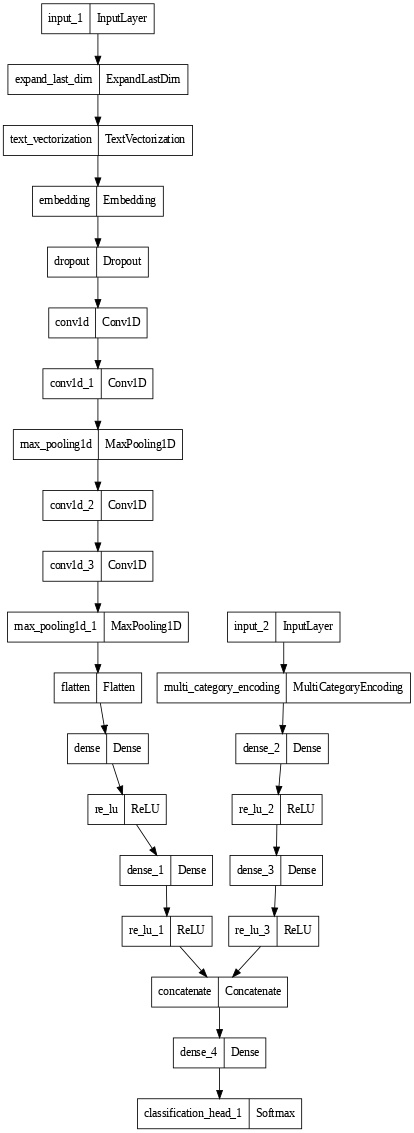

In [ ]:
utils.plot_model(best_model, dpi=60)

45/45 [==============================] - 10s 37ms/step


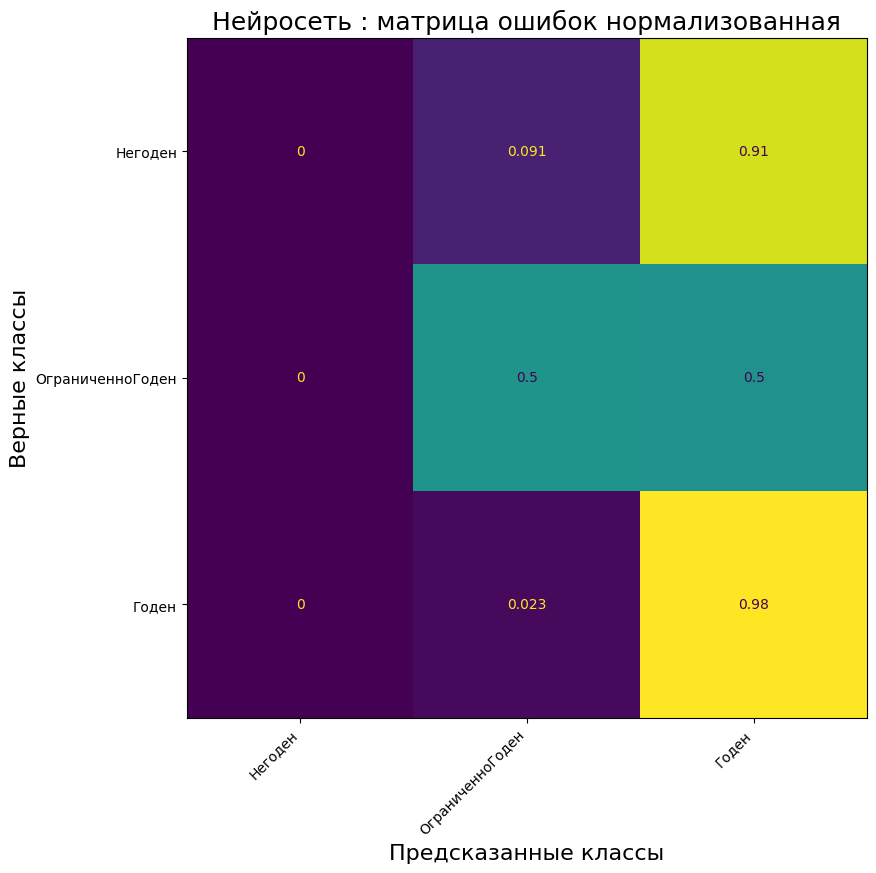

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  49%


In [ ]:
# Запуск предсказания и визуализация
eval_model(best_model, [texts_all_np, X_data],
                           y_train, class_labels = CLASS_DICT)

##8. Этап. Отработка гипотезы разбиения на 2 класса:

*   -годен
*   -требует внимания



In [ ]:
# Загрузка базы данных заказчика, предварительно сохарненной в формате *.csv
df = pd.read_csv('/content/drive/MyDrive/internsheep1/profpat_1.csv')


<ipython-input-70-7b983cea7a77>:2: DtypeWarning: Columns (24,25,26,43,44,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,77,78,79,81,84,85,86,87,88,89,90,91,92,108,109,112,113,120,121,122,123,124,125,126,127,162,163,164,168,169,170,171,172,173,174,195,196,201,202,203,204,205,206,207,208,221,222,223,228,229,230,252,253,258,259,260,261,262,263,264,265,266,267,270,271,272,273,276,277,278,279,282,283,284,285,286,287,293,294,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,363,364,365,366,367,370,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,418,419,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,470,471,472,483,484,485,486,491,492,514,515,549,550,551,552,553,554,555,564,565,578,579,580,581,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,

In [ ]:
CLASS_COUNT = 2

# Задаем словарь классов
CLASS_DICT2 ={'ТребуетВнимания':0, 'Годен':1}

# Задаем словарь групп здоровья
GZ_DICT ={'':0, 'I':1, 'II':2, 'IIIа':3, 'IIIб':4}

# Список порогов возраста
age_class = [11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

# Создаем метрику для разбалансированных классов
custom_metric2 = tfa.metrics.F1Score(num_classes=CLASS_COUNT, average="weighted", threshold=0.5, name='F1Score' )

In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

 # Преобразование значения возраста в one hot encoding

def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)


In [ ]:
# Отдельные функции под 2-классовую модель
# - о ворасте OHE

# Извлечение даты рождения для выборки
# Функция извлечения даты рождения
def extract_DB(df_db):
    result = []
    COL_DB    = df_db.columns.get_loc('Возраст')
    # Для всех строк таблицы: собрать значения
    # столбцов профессии
    for row in  df_db.values:
                    result.append(int(row[COL_DB]))

    DB_list_2 = result
    x_train_age_02 = np.zeros ((len(df_db), age_class[0]))

    # Вычисление счетчиков для данных разбиения
    for class_desc in [age_class]:
      if isinstance(class_desc[1], list):
          class_desc[0] = len(class_desc[1]) + 1
      else:
          class_desc[0] = max(class_desc[1].values()) + 1

    # Преобразование последовательностей индексов
    for A in range(len(DB_list_2)):
      x_train_age_02[A,:] = np.array(age_years_to_ohe(DB_list_2[A]))
    return x_train_age_02

# - о  классах в OHE
def Y_to_OHE2(df):
  y_list_key2 =[]
  y_list_key2 = list(df.ЗаключениеМК.values)
  # print (y_list_key)
  y_list2 = []
  for CD2 in y_list_key2:
    y_list2.append(CLASS_DICT2[CD2])
  # print (y_list)

  y_data2 = np.array(y_list2)            # Перевод общего списка меток класса в numpy-массив

  # y_res2 = utils.to_categorical(y_data2, CLASS_COUNT)
  return y_data2

In [ ]:
# Функция обработки даты рождения
def age_of_DB (df0):

  df1 = df0.copy()
  # Получим список дат
  list_of_DB = df0['Возраст'].tolist()
  clearage=[]
  for B in list_of_DB:
    clearage.append(2023-(1900+int(re.search(r'(\d{1,2})\/(\d{1,2})\/(\d{2})', B)[3])))

  # Поместим в новую колонку очищенные строки из полученного списка
  df1['Возраст'] = True
  df1['Возраст'] = clearage

  # Получаем новую таблицу данных
  df1=df1[['ЗаключениеМК',
           'Возраст',
           'ГруппаЗдоровья',
           'Вредность',
           'Диагнозы',
           'Рекомендации']]
  return df1

  # Функция обработки столбца сводного диагноза
def diag_adv2 (df0):

  df1 = df0.copy()
  # Получим список всех сводных диагнозов
  list_of_Diag = df1['Свод_Диагноз'].tolist()
  # Используя заготовленную функцию, очистим каждую строку от "мусора"
  clearlistdiag=[]
  for A in list_of_Diag:
    clearlistdiag.append(purify(A))
  # Поместим в новую колонку очищенные строки из полученного списка
  df1['Диагнозы'] = True
  df1['Диагнозы'] = clearlistdiag

  # Получаем новую таблицу данных
  df1=df1[['ЗаключениеМК',
           'Возраст',
           'ГруппаЗдоровья',
           'Вредность',
           'Диагнозы',
           'Рекомендации']]
  return df1

  # Функция обработки столбца рекомендаций
def recom_adv2 (df1):
    df2 = df1.copy()
    # Получим список всех рекомендаций
    list_of_recom = df2['Рекомендации'].tolist()
    # Используя заготовленную функцию, очистим каждую строку от "мусора"
    clearlistrecom=[]
    for A in list_of_recom:
      clearlistrecom.append(purify(A))
    # Поместим в новую колонку очищенные строки из полученного списка
    df2['Рекомендации'] = True
    df2['Рекомендации'] = clearlistrecom

    # Получаем новую таблицу данных
    df2=df2[['ЗаключениеМК',
             'Возраст',
              'ГруппаЗдоровья',
              'Вредность',
              'Диагнозы',
              'Рекомендации']]
    return df2

In [ ]:
# Сформируем отдельную функцию, которая по передаваемой исходной таблицы создает сжатую
def getclin2(df_in):
  # Получаем на вход некую таблицу данных вида аналогичного первоначально предоставленной
  # Подготовка таблицы данных
  # Убираем полностью пустые строки
  df_in = df_in.dropna(axis=1, how='all')

  # Убираем строки в которых отстутствует одно из встреченных заключений Профпатолога (ПП)
  df_in = df_in[df_in['ЗаключениеМК'].isin(['Годен',
                                      'ГоденСКоррекциейЗрения',
                                      'ВременноНегоден',
                                      'НуждаетсяВДообследованииИЛечении',
                                      'ОграниченноГоден',
                                      'ГоденБезРаботНаВысотах'])]

  # Приводим к 3-м классам (Годен, Негоден, ОграниченноГоден)
  df_in.loc[df_in['ЗаключениеМК'] == 'ВременноНегоден', 'ЗаключениеМК'] = 'ТребуетВнимания'
  df_in.loc[df_in['ЗаключениеМК'] == 'НуждаетсяВДообследованииИЛечении', 'ЗаключениеМК'] = 'ТребуетВнимания'
  df_in.loc[df_in['ЗаключениеМК'] == 'ГоденСКоррекциейЗрения', 'ЗаключениеМК'] = 'ТребуетВнимания'
  df_in.loc[df_in['ЗаключениеМК'] == 'ГоденБезРаботНаВысотах', 'ЗаключениеМК'] = 'ТребуетВнимания'
  df_in.loc[df_in['ЗаключениеМК'] == 'ОграниченноГоден', 'ЗаключениеМК'] = 'ТребуетВнимания'

  # Для удобства обращения к столбцу, переименуем его в название из одного слова
  df_in.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )
  df_in.rename(columns = {'Диспансерная Группа':'ГруппаЗдоровья'}, inplace = True )
  df_in.rename(columns = {'КлиентДатаРождения':'Возраст'}, inplace = True )

  # Оставляем только значащие для нас колонки: Заключение ПП, Вредность и Диагнозы узких специалистов в текстовом представлении
  df_in = df_in[['ЗаключениеМК',
  'Возраст',
  'ГруппаЗдоровья',
  'Вредность',
  'Психиатрия Наркология1 Диагноз Представление1',
  'Офтальмология1_ДиагнозПредставление1',
  'Оториноларингология1_ДиагнозПредставление1',
  'Гинекология1_ДиагнозПредставление1',
  'Стоматология1_ДиагнозПредставление1',
  'Дерматовенерология1_ДиагнозПредставление1',
  'Рентгенология1_ДиагнозПредставление1',
  'Неврология1_ДиагнозПредставление1',
  'Терапия1_ДиагнозПредставление1',
  'Хирургия1_ДиагнозПредставление1',
  'Офтальмология1_ДиагнозПредставление2',
  'Терапия2_ДиагнозПредставление1',

  'ЛабораторныеИсследования1_ХР_Рекомендация1Представление',
  'Рентгенология1_Заключение_ЗначениеПредставление',
  'ПсихиатрияНаркология1_ХР_Рекомендация1Представление',
  'Офтальмология1_ХР_Рекомендация1Представление',
  'Офтальмология1_ХР_Рекомендация2Представление',
  'Оториноларингология1_ХР_Рекомендация1Представление',
  'Гинекология1_ХР_Рекомендация1Представление',
  'Гинекология1_ХР_Рекомендация2Представление',
  'ФункциональнаяДиагностика1_ХР_Рекомендация1Представление',
  'Стоматология2_ХР_Рекомендация1Представление',
  'Терапия1_ХР_Рекомендация1Представление',
  'Терапия1_ХР_Рекомендация2Представление',
  'Дерматовенерология1_ХР_Рекомендация1Представление',
  'Дерматовенерология1_ХР_Рекомендация2Представление',
  'Неврология1_ХР_Рекомендация1Представление',
  'Хирургия1_ХР_Рекомендация1Представление',
  'Терапия2_ХР_Рекомендация1Представление',
  'Терапия2_ХР_Рекомендация2Представление'
  ]]

  # Заменяем отсутсвтующие записи узких специалистов в пробелы
  df_in=df_in.fillna('')

  # Обобщенный диагноз - собирем диагнозы узких специалистов в одну строку через запятую
  df_in['Свод_Диагноз'] = (df_in['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ','
  + df_in['Офтальмология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Оториноларингология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Гинекология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Стоматология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Дерматовенерология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Рентгенология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Неврология1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Терапия1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Хирургия1_ДиагнозПредставление1'].map(str)+ ','
  + df_in['Офтальмология1_ДиагнозПредставление2'].map(str)+ ','
  + df_in['Терапия2_ДиагнозПредставление1'].map(str))



  # Обобщенная рекомендация
  df_in['Рекомендации'] = (df_in['ЛабораторныеИсследования1_ХР_Рекомендация1Представление'].map(str) + ','
  + df_in['Рентгенология1_Заключение_ЗначениеПредставление'].map(str) + ','
  + df_in['ПсихиатрияНаркология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Офтальмология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Офтальмология1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['Оториноларингология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Гинекология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Гинекология1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['ФункциональнаяДиагностика1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Стоматология2_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['Дерматовенерология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Дерматовенерология1_ХР_Рекомендация2Представление'].map(str)+ ','
  + df_in['Неврология1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Хирургия1_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия2_ХР_Рекомендация1Представление'].map(str)+ ','
  + df_in['Терапия2_ХР_Рекомендация2Представление'].map(str))


  # # Упростим таблицу данных до 6 столбцов
  # df_in1 = df_in[['ЗаключениеМК',
  #                'Возраст',
  #                'ГруппаЗдоровья',
  #                'Вредность',
  #                'Свод_Диагноз',
  #                'Рекомендации']]

  # Получаем новую таблицу данных
  df_res1=diag_adv2(df_in)
  df_res2=recom_adv2(df_res1)
  df_res3=age_of_DB(df_res2)

  # Удаляем строки с отстуствующими записями всех узких специалистов
  df_res3 = df_res3[df_res3['Диагнозы']!='']

  # обновляем номера индексов
  df_res=df_res3.reset_index(drop=True)
  return df_res

In [ ]:
# Функция преобразования данных из таблицы во входные данные для модели

def getXdata_5sign (df_res):
  # Извлечение текстов о вредности для выборки
  harm_text = extract_harm_text(df_res)

  tokenizer_harm.fit_on_texts(harm_text)
  items_harm = list(tokenizer_harm.word_index.items())

  # Преобразование текстов в последовательность индексов согласно частотному словарю
  harm_seq = tokenizer_harm.texts_to_sequences(harm_text)

  # Преобразование последовательностей индексов в bag of words
  x_harm = tokenizer_harm.sequences_to_matrix(harm_seq)

  # Извлечение текстов о сводном диагнозе для выборки
  Diag_text = extract_Diag_text(df_res)

  tokenizer_Diag.fit_on_texts(Diag_text)
  items_Diag = list(tokenizer_Diag.word_index.items())

  # Преобразование текстов в последовательность индексов согласно частотному словарю
  Diag_seq = tokenizer_Diag.texts_to_sequences(Diag_text)

  # Преобразование последовательностей индексов в bag of words
  x_diag = tokenizer_Diag.sequences_to_matrix(Diag_seq)


  # Извлечение текстов о рекомендациях для выборки
  recom_text = extract_recom_text(df_res)

  tokenizer_recom.fit_on_texts(recom_text)
  items_recom = list(tokenizer_recom.word_index.items())

  # Преобразование текстов в последовательность индексов согласно частотному словарю
  recom_seq = tokenizer_recom.texts_to_sequences(recom_text)

  # Преобразование последовательностей индексов в bag of words
  x_recom = tokenizer_recom.sequences_to_matrix(recom_seq)

  # Получение данных о группе здоровья
  x_gz = extract_gz(df_res)

  # Получение данных о возрасте
  x_age = extract_DB(df_res)


  return x_harm, x_diag, x_gz, x_recom, x_age

In [ ]:
dfFix2=getclin2(df)
print (dfFix2.ЗаключениеМК.value_counts())
print (dfFix2.shape)
dfFix2.columns.tolist()

Годен              1284
ТребуетВнимания     136
Name: ЗаключениеМК, dtype: int64
(1420, 6)


['ЗаключениеМК',
 'Возраст',
 'ГруппаЗдоровья',
 'Вредность',
 'Диагнозы',
 'Рекомендации']

In [ ]:
dfFix2 = dfFix2.sample(frac=1).reset_index(drop=True)

In [ ]:
x_train_harm, x_train_diag, x_train_gz, x_train_recom, x_train_age = getXdata_5sign(dfFix2)


In [ ]:
print (CLASS_DICT2)

{'ТребуетВнимания': 0, 'Годен': 1}


In [ ]:
# Перевод классов в OHE
y_data2 = Y_to_OHE2(dfFix2)

y_data2=y_data2.reshape(1420,1)
print (y_data2)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
print('Размер выборки Вредности', x_train_harm.shape)
print('Размер выборки Диагноза', x_train_diag.shape)
print('Размер выборки Группы здоровья', x_train_gz.shape)
print('Размер выборки Рекомендаций', x_train_recom.shape)
print('Размер выборки Заключения', y_data2.shape)
print('Размер выборки Возраст', x_train_age.shape)

# print(x_train_gz)


Размер выборки Вредности (1420, 256)
Размер выборки Диагноза (1420, 512)
Размер выборки Группы здоровья (1420, 5)
Размер выборки Рекомендаций (1420, 128)
Размер выборки Заключения (1420, 1)
Размер выборки Возраст (1420, 11)


In [ ]:
X_data2 = np.concatenate((x_train_harm, x_train_diag, x_train_gz, x_train_recom, x_train_age), axis =1)
print('Размер общей выборки', X_data2.shape)

Размер общей выборки (1420, 912)


In [ ]:
data2 = dfFix2.values #Вытаскиваем данные в numpy array
# сохраним все тексты в отдельный список
texts_all=[]
for i in range(len(data2)):
    last_element = data2[i][-1]
    texts_all.append(last_element)

In [ ]:
print(len(texts_all))
texts_all_np = np.array(texts_all, dtype='<U9455')

1420


In [ ]:
# Инициализация модели с несколькими входными и выходными данными.
# инициализируем модель
input_node = [ak.TextInput(), ak.StructuredDataInput()]
output_node = ak.TextBlock(max_tokens=100)(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead(metrics=[custom_metric2])(output_node)

model_ak2 = ak.AutoModel(
    inputs=[input_node],
    outputs=[output_node],
    tuner="bayesian",
    # loss='mean_squared_error',
    # objective='binary',
    overwrite=True,
    max_trials=5 )
# Обучаем модель на подготовленных данных.
model_ak2.fit(
    [texts_all_np, x_train_gz],
    y_data2,
    epochs=10,
)

Trial 2 Complete [00h 00m 06s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 11s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
transformer       |transformer       |text_block_2/block_type
True              |False             |dense_block_3/use_batchnorm
2                 |1                 |dense_block_3/num_layers
256               |16                |dense_block_3/units_0
0.5               |0                 |dense_block_3/dropout
256               |1024              |dense_block_3/units_1
0.5               |0.25              |classification_head_2/dropout
adam              |adam_weight_decay |optimizer
0.001             |0.1               |learning_rate
none              |none              |text_block_2/transformer_1/pretraining
128               |128               |text_block_2/transformer_1/embedding_dim
32                |8                 |text_block_2/transformer_1/num_heads
1024              |2048              |text_block_2/transfor

In [ ]:
# Сохранение модели на диск
best_model2 = model_ak2.export_model()

In [ ]:
best_model2.summary()

In [ ]:
utils.plot_model(best_model2, dpi=60)

In [ ]:
# Запуск предсказания и визуализация
eval_model(best_model2, [texts_all_np, x_train_age],
                           y_data2, class_labels = CLASS_DICT2)